In [ ]:
## TODO



## Variable Categorisation
# -> mindlessly add variables to categories
# -> check category overlap

## Processing Algorithm
# -> needs to store variance (a lot of dummy variables) -> maybe skip very low variances? for low abs numbers could just sum
# -> maybe also save the means for low/high auth

In [ ]:
# https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3022169
# https://www.academia.edu/34687343/Authoritarianism_social_structure_and_economic_policy_preferences?auto=download

In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

var_type (10365, 13)
CPU times: total: 2min 26s
Wall time: 2min 59s


In [110]:
BES_reduced_with_na.index=BES_Panel.index
for wave in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    age_var = "ageW"+str(wave)
    ageGroup_var = "ageGroupW"+str(wave)+"__66+"
#     BES_Panel.loc[BES_Panel[age_var]>100,age_var]=np.nan
    BES_reduced_with_na.loc[BES_reduced_with_na[age_var]>100,age_var]=np.nan
    BES_reduced_with_na.loc[BES_reduced_with_na[age_var]>100,ageGroup_var]=np.nan


In [111]:
# search(BES_reduced_with_na,"ageGroup")
BES_Panel["ageW19"].max()

119.0

In [ ]:
# Modeling Approach
# We use a simple linear regression model specification with the relevant outcome measure y regressed
# on authoritarianism, the relevant demographic and interaction between the demographic and
# authoritarianism (where the demographic has multiple categories we include main effects and
# interactions for each one). We also include relevant controls in each model. All models include a five
# category education variable and age as controls, and models predicting attitudes other than the leftright
# scale include the left-right scale as a control variable.
# We also include relevant controls in each model. All models include a five category education
# variable and age as controls, and models predicting attitudes other than the left-right scale include the
# left-right scale as a control variable. We present the results of these models using average marginal
# effects plots, which show the predicted level of the outcome variable across a demographic category
# for different levels of authoritarianism.

In [2]:
al_scale = BES_reduced_with_na[search(BES_reduced_with_na,"al_scale").index].mean(axis=1)
lr_scale = BES_reduced_with_na[search(BES_reduced_with_na,"lr_scale").index].mean(axis=1)

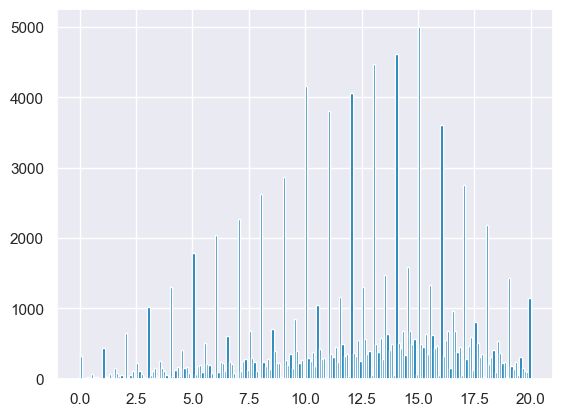

In [3]:
al_scale.hist(bins=200);

In [10]:
al_scale.isnull().sum()

7404

In [54]:
most_lib_tenth = al_scale<=al_scale.quantile(.1)
most_lib_tenth.sum()

10438

In [55]:
most_auth_tenth = al_scale>=al_scale.quantile(.9)
most_auth_tenth.sum()

10465

In [50]:
most_auth_hundredth = al_scale>=al_scale.quantile(.9)
most_auth_hundredth.sum()

2086

In [ ]:
%%time

lib_corrs = BES_reduced_with_na[most_lib_tenth].corr()
auth_corrs = BES_reduced_with_na[most_auth_tenth].corr()

In [13]:
%%time
auth_corrs = BES_reduced_with_na[most_auth_tenth].corr()

KeyboardInterrupt: 

In [21]:
variances = BES_reduced_with_na[most_auth_tenth+most_lib_tenth].var()

In [52]:
var_thresh = .1

drop_cols = list(variances[variances<var_thresh].index)
drop_cols = drop_cols +list(search(BES_reduced_with_na,"al_scale|^al\d|lr_scale|^lr\d").index)
drop_cols = list(set(drop_cols))
keep_cols = [x for x in BES_reduced_with_na.columns if x not in drop_cols]

len(keep_cols)

6707

In [44]:
%%time
auth_corrs = BES_reduced_with_na[most_auth_hundredth][keep_cols].corr()

Wall time: 32 s


In [47]:
%%time
auth_corrs = BES_reduced_with_na[most_auth_hundredth][keep_cols].corr()

Wall time: 1min 27s


In [53]:
%%time
auth_corrs = BES_reduced_with_na[most_auth_hundredth][keep_cols].corr()

Wall time: 58.8 s


In [73]:
%%time

lib_corrs  = BES_reduced_with_na[most_lib_tenth][keep_cols].corr(min_periods=100)
auth_corrs = BES_reduced_with_na[most_auth_tenth][keep_cols].corr(min_periods=100)

Wall time: 14min 5s


<AxesSubplot:>

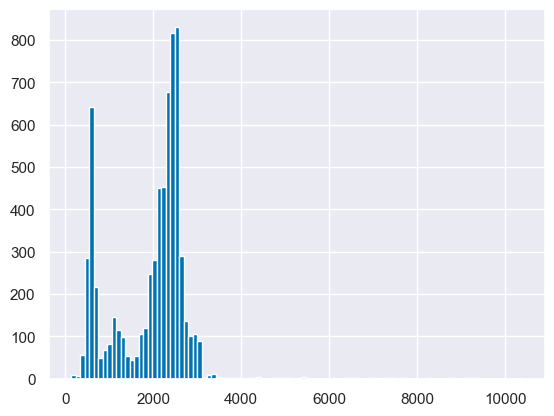

In [72]:
BES_reduced_with_na[most_lib_tenth][keep_cols].notnull().sum().hist(bins=100)

In [76]:
gap_corrs = lib_corrs-auth_corrs

In [77]:
gap_corrs.stack().sort_values()

trustYourMPW17__A great deal of trust                                  mpBrexitViewW17__Strongly support                                       -1.180128
mpBrexitViewW17__Strongly support                                      trustYourMPW17__A great deal of trust                                   -1.180128
mpBrexitViewW18__Strongly support                                      trustYourMPW17__A great deal of trust                                   -1.169394
trustYourMPW17__A great deal of trust                                  mpBrexitViewW18__Strongly support                                       -1.169394
redistSelfW2__Government should be less concerned about equal incomes  redistUKIPW2__Government should be less concerned about equal incomes   -1.112421
                                                                                                                                                  ...   
localElectionVoteW16_Conservative                                      ashcroftW4_

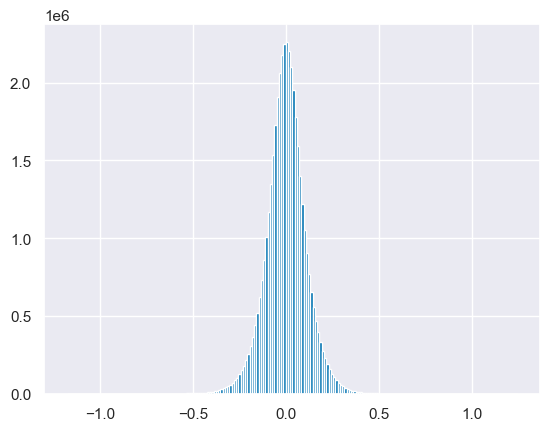

In [78]:
gap_corrs.stack().hist(bins=200);
# beautiful!

In [81]:
gap_corrs_df = pd.DataFrame(gap_corrs.stack()[gap_corrs.stack().abs()>.5]).reset_index()
gap_corrs_df["abs_corr"] = gap_corrs_df[0].abs()
gap_corrs_df

level_0  \
0       turnoutUKGeneralW3__Very likely that I will vote   
1       turnoutUKGeneralW5__Very likely that I will vote   
2      turnoutUKGeneralW20__Very likely that I will vote   
3                     partyIdStrengthW2__Not very strong   
4                     partyIdStrengthW2__Not very strong   
...                                                  ...   
29859                          ukipPriorities2_nhsW4_Yes   
29860                          ukipPriorities2_nhsW4_Yes   
29861                          ukipPriorities2_nhsW4_Yes   
29862                          labPriorities2_econW4_Yes   
29863                          labPriorities2_econW4_Yes   

                                  level_1         0  
0      conLookAfterUnempW19__Very closely -0.535741  
1       localElectionVoteW16_Conservative -0.720470  
2               ukipPriorities_econW4_Yes -0.541989  
3                      leftRightW9__Right  0.530557  
4                    euMoreW25__Many more -0.561959  
...                                   ...       ...  
29859     dealVremainW16_Remain in the EU -0.594098  
29860              euIDW16_The leave side  0.639956  
29861     dealVremainW17_Remain in the EU -0.571329  
29862        immigLabW20__Allow many more  0.509218  
29863           p_housingW20_Own outright  0.597992  

[29864 rows x 3 columns]

In [115]:
gap_corrs_df.sort_values(by='abs_corr',ascending=False).head(20)

level_0  \
27002  ashcroftW5_United Kingdom Independence Party (...   
27361                  localElectionVoteW16_Conservative   
25247  generalElectionVoteW4_United Kingdom Independe...   
27327                  localElectionVoteW16_Conservative   
26962  ashcroftW4_United Kingdom Independence Party (...   
27357                  localElectionVoteW16_Conservative   
25355  generalElectionVoteW5_United Kingdom Independe...   
27329                  localElectionVoteW16_Conservative   
15327                  mpBrexitViewW17__Strongly support   
15343              trustYourMPW17__A great deal of trust   
16964                  mpBrexitViewW18__Strongly support   
15346              trustYourMPW17__A great deal of trust   
27087  localElectionVoteW7_United Kingdom Independenc...   
26816                          bestOnMIIW22_Conservative   
1292   redistSelfW2__Government should be less concer...   
1298   redistUKIPW2__Government should be less concer...   
27352                  localElectionVoteW16_Conservative   
26636  bestOnMIIW4_United Kingdom Independence Party ...   
27354                  localElectionVoteW16_Conservative   
26676  bestOnMIIW6_United Kingdom Independence Party ...   

                                                 level_1         0  abs_corr  
27002                  localElectionVoteW16_Conservative  1.246331  1.246331  
27361  ashcroftW5_United Kingdom Independence Party (...  1.246331  1.246331  
25247                  localElectionVoteW16_Conservative  1.242575  1.242575  
27327  generalElectionVoteW4_United Kingdom Independe...  1.242575  1.242575  
26962                  localElectionVoteW16_Conservative  1.230447  1.230447  
27357  ashcroftW4_United Kingdom Independence Party (...  1.230447  1.230447  
25355                  localElectionVoteW16_Conservative  1.229178  1.229178  
27329  generalElectionVoteW5_United Kingdom Independe...  1.229178  1.229178  
15327              trustYourMPW17__A great deal of trust -1.180128  1.180128  
15343                  mpBrexitViewW17__Strongly support -1.180128  1.180128  
16964              trustYourMPW17__A great deal of trust -1.169394  1.169394  
15346                  mpBrexitViewW18__Strongly support -1.169394  1.169394  
27087                          bestOnMIIW22_Conservative  1.161288  1.161288  
26816  localElectionVoteW7_United Kingdom Independenc...  1.161288  1.161288  
1292   redistUKIPW2__Government should be less concer... -1.112421  1.112421  
1298   redistSelfW2__Government should be less concer... -1.112421  1.112421  
27352  bestOnMIIW4_United Kingdom Independence Party ...  1.110404  1.110404  
26636                  localElectionVoteW16_Conservative  1.110404  1.110404  
27354  bestOnMIIW6_United Kingdom Independence Party ...  1.073456  1.073456  
26676                  localElectionVoteW16_Conservative  1.073456  1.073456

In [211]:
gap_corrs_df[gap_corrs_df["level_1"]=="subnatAttach4W19_Yes"].sort_values(by='abs_corr',ascending=False).head(50)

level_0  \
27682                                 countryW25_England   
27499                                  countryW1_England   
27647                                 countryW18_England   
27537                                  countryW4_England   
27671                                 countryW23_England   
27631                                 countryW15_England   
27526                                  countryW3_England   
27512                                  countryW2_England   
27656                                 countryW20_England   
27558                                  countryW6_England   
27636                                 countryW16_England   
27616                                 countryW13_England   
27652                                 countryW19_England   
27624                                 countryW14_England   
27547                                  countryW5_England   
27641                                 countryW17_England   
27608                                 countryW12_England   
27675                                 countryW24_England   
27591                                 countryW10_England   
27660                                 countryW21_England   
27583                                  countryW9_England   
27575                                  countryW8_England   
28418         p_scot_list_vote_2016_I would/did not vote   
27666                                 countryW22_England   
28398        p_scot_const_vote_2016_I would/did not vote   
24788  p_turnout_scot_ref__No, I was not eligible to ...   

                    level_1         0  abs_corr  
27682  subnatAttach4W19_Yes -0.689512  0.689512  
27499  subnatAttach4W19_Yes -0.667392  0.667392  
27647  subnatAttach4W19_Yes -0.636249  0.636249  
27537  subnatAttach4W19_Yes -0.612543  0.612543  
27671  subnatAttach4W19_Yes -0.611573  0.611573  
27631  subnatAttach4W19_Yes -0.610454  0.610454  
27526  subnatAttach4W19_Yes -0.600549  0.600549  
27512  subnatAttach4W19_Yes -0.599397  0.599397  
27656  subnatAttach4W19_Yes -0.596570  0.596570  
27558  subnatAttach4W19_Yes -0.596472  0.596472  
27636  subnatAttach4W19_Yes -0.594595  0.594595  
27616  subnatAttach4W19_Yes -0.587811  0.587811  
27652  subnatAttach4W19_Yes -0.573025  0.573025  
27624  subnatAttach4W19_Yes -0.554903  0.554903  
27547  subnatAttach4W19_Yes -0.553864  0.553864  
27641  subnatAttach4W19_Yes -0.547997  0.547997  
27608  subnatAttach4W19_Yes -0.546724  0.546724  
27675  subnatAttach4W19_Yes -0.543033  0.543033  
27591  subnatAttach4W19_Yes -0.539057  0.539057  
27660  subnatAttach4W19_Yes -0.531165  0.531165  
27583  subnatAttach4W19_Yes -0.525168  0.525168  
27575  subnatAttach4W19_Yes -0.513947  0.513947  
28418  subnatAttach4W19_Yes -0.513503  0.513503  
27666  subnatAttach4W19_Yes -0.506818  0.506818  
28398  subnatAttach4W19_Yes -0.502184  0.502184  
24788  subnatAttach4W19_Yes  0.501484  0.501484

In [157]:
# gap_corrs_df["level_1"].value_counts()[50:].head(50)

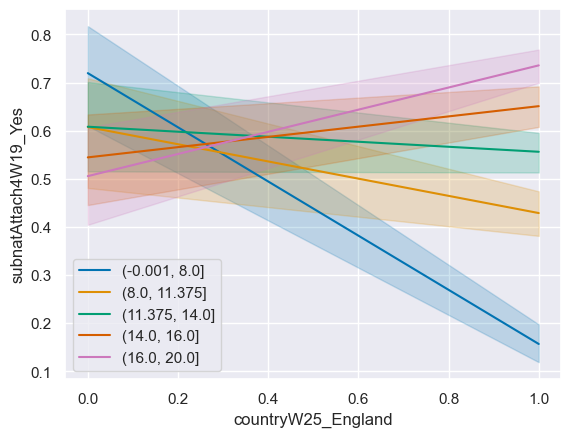

In [212]:
# var1 = "lrLabW25__Right"
# var2 = "likeStarmerW25__Strongly like"
# var1 = "countryW11_Scotland"
# var2 = "happyScotIndepResultW11__Extremely happy"
# var1 = "localElectionVoteW16_Conservative"
# var2 = "ashcroftW5_United Kingdom Independence Party (UKIP)"
# var1 = "mpBrexitViewW17__Strongly support"
# var2 = "trustYourMPW17__A great deal of trust"
# var1 = "redistSelfW2__Government should be less concerned about equal incomes"
# var2 = "redistUKIPW2__Government should be less concerned about equal incomes"
# var1 = "dv2w2W2__Should definitely become independent"
# var2 = "likeStarmerW25__Strongly like"
#????
# var1 = "euIDStrengthW16__Not very strong"
# var2 = "brexitSelfW16__Remain in the EU"
# var2 = "leftRightW25__Right"
# var1 = "socialDistLDW7__Very happy"
# var2 = "leftRightW25__Right"
# var1 = "likeStarmerW24__Strongly like"
# var1 = "p_educationW14_GCE A level or Higher Certificate"
# var2 = "p_edlevelW14__Postgrad"
# var1 = "redistSelfW23__Government should be less concerned about equal incomes"
# var2 = "redistConW23__Government should be less concerned about equal incomes"
# var1 = "happyWalesIndepResultScaleW17__Extremely happy"
# var2 = "countryW4_England"
# countryW25_England	subnatAttach4W19_Yes
# var1 = "countryW25_England"
# var2 = "subnatAttach4W19_Yes"

# p_edlevelW14__Postgrad	p_educationW14_GCE A level or Higher Certificate

sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,hue=pd.qcut(al_scale,q=5));

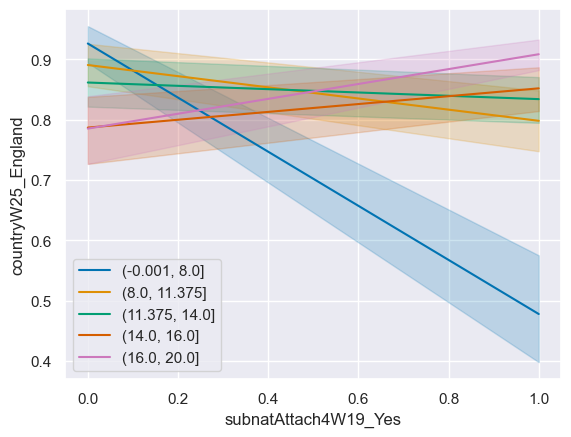

In [213]:
sns.lineplot(data=BES_reduced_with_na,x=var2,y=var1,hue=pd.qcut(al_scale,q=5));

In [122]:
search(BES_reduced_with_na,"redistSelfW2")

redistSelfW2__Government should be less concerned about equal incomes     26358
redistSelfW20__Government should be less concerned about equal incomes    27609
redistSelfW21__Government should be less concerned about equal incomes    26170
redistSelfW22__Government should be less concerned about equal incomes    24206
redistSelfW23__Government should be less concerned about equal incomes    27357
redistSelfW24__Government should be less concerned about equal incomes    13414
redistSelfW25__Government should be less concerned about equal incomes    27143
dtype: int64

<AxesSubplot:>

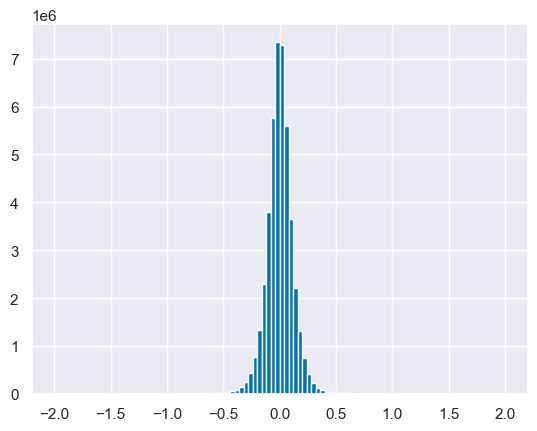

In [66]:
gap_corrs.stack().hist(bins=100)

In [ ]:
## double the indices and time goes up 3x

In [ ]:
## reduce cols from 8262 to 6707

In [ ]:
########################


## ideally, we'd have a nice categorisation for variables

# say into "political"/"attitudinal"/"demographic"

In [ ]:
scotIndepEconomyW2__Very likely


In [99]:
pol_vars_pat = "like|ptv|.*(Lab|Con|LD|TIG|Starmer|Johnson|Corbyn|Brexit|Remain|Leave|UKIP|May|greens|Grn|Green|Farron|Farage|PC|Other|Ind)|labHandle|govtHandle|labGov|partyId|generalElectionVote"+\
    "|.*(Angry|Hope|Proud)|approve|(lab|con|ukip|ld|green|grn).*|socialDist"
vc = gap_corrs_df["level_1"].value_counts()
vc.drop([x for x in vc.index if re.match(pol_vars_pat,x)])[100:].head(50)

NameError: name 'gap_corrs_df' is not defined

True

In [207]:
drop_vars = [x for x in vc.index if re.match(pol_vars_pat,x)]
pol_vars_removed = (~gap_corrs_df["level_0"].isin(drop_vars))&(~gap_corrs_df["level_1"].isin(drop_vars))
gap_corrs_df[pol_vars_removed]["level_0"].value_counts().head(50)

happyScotIndepResultW11__Extremely happy            79
happyScotIndepResultW17__Extremely happy            78
happyScotIndepResultW21__Extremely happy            56
p_educationW14_GCE A level or Higher Certificate    29
happyWalesIndepResultScaleW17__Extremely happy      26
subnatAttach4W19_Yes                                26
p_educationW16_GCE A level or Higher Certificate    24
p_educationW17_GCE A level or Higher Certificate    23
p_educationW10_GCE A level or Higher Certificate    23
p_educationW15_GCE A level or Higher Certificate    22
euIDStrengthW16__Not very strong                    21
p_educationW9_GCE A level or Higher Certificate     20
p_educationW7_GCE A level or Higher Certificate     19
p_educationW24_GCE A level or Higher Certificate    19
p_educationW8_GCE A level or Higher Certificate     18
p_educationW23_GCE A level or Higher Certificate    18
p_educationW21_GCE A level or Higher Certificate    17
p_educationW12_GCE A level or Higher Certificate    17
p_edlevelW

In [158]:
list(match(BES_Panel,"change").index)

['changeEconomyW1',
 'changeNHSW1',
 'changeEducationW1',
 'changeCostLiveW1',
 'changeImmigW1',
 'changeCrimeW1',
 'changeEconomyLabW1',
 'changeNHSLabW1',
 'changeEducationLabW1',
 'changeCostLiveLabW1',
 'changeImmigLabW1',
 'changeCrimeLabW1',
 'changeEconomyW2',
 'changeNHSW2',
 'changeEducationW2',
 'changeCostLiveW2',
 'changeImmigW2',
 'changeCrimeW2',
 'changeEconomyLabW2',
 'changeNHSLabW2',
 'changeEducationLabW2',
 'changeCostLiveLabW2',
 'changeImmigLabW2',
 'changeCrimeLabW2',
 'changeEconomyW3',
 'changeNHSW3',
 'changeEducationW3',
 'changeCostLiveW3',
 'changeImmigW3',
 'changeCrimeW3',
 'changeEconomyLabW3',
 'changeNHSLabW3',
 'changeEducationLabW3',
 'changeCostLiveLabW3',
 'changeImmigLabW3',
 'changeCrimeLabW3',
 'changeEconomyW4',
 'changeNHSW4',
 'changeEducationW4',
 'changeCostLiveW4',
 'changeImmigW4',
 'changeCrimeW4',
 'changeEconomyLabW4',
 'changeNHSLabW4',
 'changeEducationLabW4',
 'changeCostLiveLabW4',
 'changeImmigLabW4',
 'changeCrimeLabW4',
 'change

In [ ]:
### categorise variables
### "political"
### "attitudinal"
### "demographic"
### "dataset"

In [215]:
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding )

var_type (10365, 13)


In [257]:
new_old_col_names

{'generalElectionVoteW1_I would/did not vote': 'generalElectionVoteW1',
 'generalElectionVoteW1_Conservative': 'generalElectionVoteW1',
 'generalElectionVoteW1_Labour': 'generalElectionVoteW1',
 'generalElectionVoteW1_Liberal Democrat': 'generalElectionVoteW1',
 'generalElectionVoteW1_Scottish National Party (SNP)': 'generalElectionVoteW1',
 'generalElectionVoteW1_Plaid Cymru': 'generalElectionVoteW1',
 'generalElectionVoteW1_United Kingdom Independence Party (UKIP)': 'generalElectionVoteW1',
 'generalElectionVoteW1_Green Party': 'generalElectionVoteW1',
 'generalElectionVoteW1_British National Party (BNP)': 'generalElectionVoteW1',
 'generalElectionVoteW2_I would/did not vote': 'generalElectionVoteW2',
 'generalElectionVoteW2_Conservative': 'generalElectionVoteW2',
 'generalElectionVoteW2_Labour': 'generalElectionVoteW2',
 'generalElectionVoteW2_Liberal Democrat': 'generalElectionVoteW2',
 'generalElectionVoteW2_Scottish National Party (SNP)': 'generalElectionVoteW2',
 'generalElectio

In [ ]:
### 671 different response strings ... not a quick shortcut!

In [ ]:
### we could label *some* and try to label rest from supervised learning ... but on the pattern of answers?

In [ ]:
### try putting sets together!

In [546]:
search(BES_Panel,"voterID")


voterID_1W21           30281
voterID_2W21           30281
voterID_3W21           30281
voterID_4W21           30281
voterID_5W21           30281
voterID_6W21           30281
voterID_7W21           30281
voterID_111W21         30281
voterID_1W22           28113
voterID_2W22           28113
voterID_3W22           28113
voterID_4W22           28113
voterID_5W22           28113
voterID_6W22           28113
voterID_7W22           28113
voterID_111W22         28113
voterIDSupportW25      30407
voterIDConfidentW25     7613
voterIDFraudW25         7613
voterIDVoteW25          7613
voterIDDifficultW25     7613
voterIDpage1_1W25      30407
voterIDpage1_2W25      30407
voterIDpage1_3W25      30407
voterIDpage1_111W25    30407
voterIDpage2_1W25       2350
voterIDpage2_3W25       2350
voterIDpage2_4W25       2350
voterIDpage2_5W25       2350
voterIDpage2_6W25       2350
voterIDpage2_111W25     2350
voterIDpage3_1W25       1755
voterIDpage3_2W25       1755
voterIDpage3_3W25       1755
voterIDpage3_4

In [ ]:
# demo:


# political:


# logistic:


# att:







In [572]:


# leftRight as pol because ref to Left-Right party pos
# turnoutUKGeneral pol opinion because it's about the future?/past?
demo_vars_pat = "p_|paperDays|paperLast|reasonNotRegistered|statusActivities|resourceAccess|age|under18|country|oslaua|gor|pcon|allSourceIncome"
demo_vars_pat = demo_vars_pat+"|voterID(_|page)|smallEmergency|shortages|registered|CVsuspect|infoSource|twitterInfo|fbInfo|anyUni|participation"
demo_vars_pat = demo_vars_pat+"|ukCitizen|euCitizen|commonwealthCitizen|otherCitizen|discussantsSameAddress|euSources|workingStatus|partyMember"
demo_vars_pat = demo_vars_pat+"|occCheck|selfOcc|discussPolDays|name|relationshipName|discussant|jobzone|prevJob|ns_sec|selfNum|voteMethod"
demo_vars_pat = demo_vars_pat+"|nonelecParticipation|selfOcc|discussPolDays|ccinoIT|justIT|cci|askVoteDiscuss"
demo_vars_pat = demo_vars_pat+"|sector|highRiskMedical|sickElderlyInHouse|noDependentsInHouse|schoolKidsInHouse|preschoolKidsInHouse"
demo_vars_pat = demo_vars_pat+"|reasonForTurnaway|twitterUse|fbUse|method(Family|Friends|Work|Other)|participate"
demo_vars_pat = demo_vars_pat+"|leavetoremain|(maltacyprus|uk|irish|eu|commonwealth|other)Citizen|debate(One|Two|Three)Watch|postalapply|postalTurnout"
demo_vars_pat = demo_vars_pat+"|coronaDied|regSatisfaction|incomeGuaranteeHH|incomeGuaranteePersonal"
demo_vars_pat = demo_vars_pat+"|Age|JACSsubject|churchAttendance|harassed|harrassed|S1|agreeParty"
demo_vars_pat = demo_vars_pat+"|livedAbroad|abroadCountry|access|amenities|area|askVote|askedForID|attemptTurnout|borrowEssentials|buyHomeFuture|buyHouseYear"
demo_vars_pat = demo_vars_pat+"|(current|ever)UnionMember|cvSeverity|debate|debtAmtb|debtW14|dependentsCoronavirus|disability|discussAskVote|diversityChange"
demo_vars_pat = demo_vars_pat+"|edlevelParent|euGovtLeaflet|fatherVote|motherVote|friendsEU|(mother|father)CountryBorn|languageSkills"
demo_vars_pat = demo_vars_pat+"|gender$|handed|hasValidVote|edlevelPartner|mapBelong|partnerNum|partnerOcc|studentloan"
demo_vars_pat = demo_vars_pat+"|headHouseholdPast|hhIncomeCorona|highRiskLetter|home(Amtb|Finance|Own)|howDidYouFillRegForm|howLongLivedHere|travelEU"
demo_vars_pat = demo_vars_pat+"|info(Local|National)|inheritChangeCircs|inheritMoney|(local|national)Unemployment|numChildren|vaccinated|voteMakesDifference"
demo_vars_pat = demo_vars_pat+"|mainSourceIncome|marital|marriageLength|mortgagePayment|neverPrivSchl|newspaperRead|pano|profiles_newspaper|subjectHE|work_type"
demo_vars_pat = demo_vars_pat+"|map(Asian|Black|White|Econ|House|LiveTime|LiveWork|MiddleClass|Names|Represent|Turnout|UKBirth|WorkingClass|Inequality)"
demo_vars_pat = demo_vars_pat+"|normEU|partyAgree|passport|payRise|polSocMedia|privPrimSchl|privScndSchl|registerChange|rentPayment|speakWelsh|stoppedWork"
demo_vars_pat = demo_vars_pat+"|parent(Education|Num|Occ)|parentsForeign|partnerEducation|savings|savingsAmtb|secondHome|socMediaUse|socgrade|status|workHomeCoronaPartner"




pol_vars_pat = 'like|ptv|.*(Lab|Con|LD|TIG|Starmer|Cameron|Johnson|Corbyn|Brexit|brexit|Remain|Leave|UKIP|May|greens|Grn|Green|Farron|Farage|PC|Other|Ind|SNP)|labHandle|govtHandle|labGov|partyId|generalElectionVote|.*(Angry|Hope|Proud)|approve|(lab|con|ukip|ld|green|grn|pc|snp|brex|tig).*|socialDist'
pol_vars_pat = pol_vars_pat +"|euID|scotRefID|bestOnMII|leftRight|scotReferendumIntention|turnoutUKGeneral|euRefVote|generalElectionCertainty"
pol_vars_pat = pol_vars_pat +"|responsibleCorona|pid|leaveResponsible|referendumSettled|achieveReduceImmigNone|localElectionVote"
pol_vars_pat = pol_vars_pat +"|localTurnout|pid|leaveResponsible|euRefDoOver|handleEUNegotiate|devoResponsible|whichPartiesHelped|partyHelp"
pol_vars_pat = pol_vars_pat +"|welshElectionVoteList|localElectionScotRank|regretsIHaveAFew|bestPM|candChoice"
pol_vars_pat = pol_vars_pat +"|scotElectionVoteList|selfEUCertain|partydiffconlab|noChanceCoalition|decidedVote|genElecTurnoutRetro|responsibleEconScottishGovt"
pol_vars_pat = pol_vars_pat +"|responsibleEcon|welshReferendumIntention|expectationDevoScot|expectationDevoWales|handleCorona|responsible"
pol_vars_pat = pol_vars_pat +"|EUMIICategory|FMorPM|ashcroft|(bedford|bristol|cambridge|copeland|croydon|doncaster|gm|hackney|leicester|lewisham|liverpool|london|manchester|mansfield|middlesbrough|newham|northOfTyne|salford|southYorks|tees|towerHamlets|tyne|watford|westEng|west|westYork|wmids|liverpoolRegion|westMid)(First|Second)|bestLeader|(blair|thatcher)Good|betterDeal|blameScotUnion|brexit|brx"
pol_vars_pat = pol_vars_pat +"|(tu|business|cabinet|plaid|parliament)Support|campaignVision|certaintyScotUnion|competent|integrity|trustGov|RV\d"
pol_vars_pat = pol_vars_pat +"|britainBest|dealGoodBad|dealVnodeal|delayOrNoDeal|deliversResult|earlyElecSupport|economyResponsible|euExpRef|euRefExpectation|euMIISmall|euRefCertainty"
pol_vars_pat = pol_vars_pat +"|euRefFinal|euRefPartner|euRefTurnout|euroElectionVote|euroTurnout|expectationManipCheckW1|generalElecCertainty|handleUkraine"
pol_vars_pat = pol_vars_pat +"|(globalEconomy|brexit|ukraine|pandemic|ukGovt)EconImpact|govtNatSecuritySuccess|euDominance|hungParliamentResponse"
pol_vars_pat = pol_vars_pat +"|leaveHandle|leaveImpact(Britain|Self)|leaveTone|levelGovtValue|manipCheck|partyPreferred|promise|proposal|reasonForVote"
pol_vars_pat = pol_vars_pat +"|mp(Independent|LocalNational|Roots)|mpLikelyToHelp|mpName|mpParty|myParty|partySite|pocketBookAccurate|reaskVote|reasonNonVoter"
pol_vars_pat = pol_vars_pat +"|refChoiceCertainty|remainTone|sSqueeze|scotRef|scotTurnout|scotWording|scotgovtHandle|signedUpParty|successReduceInequality"
pol_vars_pat = pol_vars_pat +"|tacticalVoteWebsite|takeTheJobVote|tryReduce|ukGovtEconImpact|visitParty|vote2019Partner|votingWish|welshTurnout|welshgovt"
pol_vars_pat = pol_vars_pat +"|whichPartySigned|worstLeader|londonAssembly|londonTurnout|mayorTurnout|dv\d"


# not sure what to do about "would you like another ref?" if LEave/Remain are taken as parties ...


# is paper reading 'demographic'?
att_vars_pat = "al_|lr_|al\d|lr\d|coronaMeasures|populism|mii|LRAL_mii|small_mii|.*Self|polAttention|auth|trustMPs|change|empathy"
att_vars_pat= att_vars_pat+"|econGen|econPersonal|riskUnemployment|riskPoverty|goodTimePurchase"
att_vars_pat= att_vars_pat+"|scottishness|britishness|englishness|welshness|europeanness|ethno|satDem|immigEcon|immigCultural"
att_vars_pat= att_vars_pat+"|knowf|euKnow|negotiationSpecifics|voterID(Support|Confident|Fraud|Vote|Difficult)"
att_vars_pat= att_vars_pat+"|efficacyNotUnderstand|efficacyPolCare|efficacyUnderstand|efficacyTooMuchEffort|efficacyNoMatter"
att_vars_pat= att_vars_pat+"|cutsTooFar|hesitantReason|dutyToVote|socialPressureVote|subjClass|cantLiveWithEU|spendLeast|spendMost"
att_vars_pat= att_vars_pat+"|childvalues|antiIntellectual|deficitReduce|noDealEmotions|enviroProtection|moreParl|genTrust|reasonForUnemployment"
att_vars_pat= att_vars_pat+"|effectsEU|immigrantsWelfareState|devoPrefWales|euPriorityBalance|privatTooFar|mapdefined|enviroGrowth"
att_vars_pat= att_vars_pat+"|prPreference|electionInterest|singlePartyEffective|scotDevoMax|UKsovereigntyPost|aom|strongLeader"
att_vars_pat= att_vars_pat+"|coalitionDontDeliver|coalitionInTune|difficultBlameCoalition"
att_vars_pat= att_vars_pat+"|engFairShare|scotFairShare|walesFairShare|localFairShare|regionFairShare|londonFairShare"
att_vars_pat= att_vars_pat+"|(female|gay|black)Equality|zeroSum|nfc|trustYourMP|noDealResults|govtHandouts|englandGovern|cspl|finlit|howToReduceDeficit"
att_vars_pat= att_vars_pat+"|knowDevoResp|(uk|subnat)Attach|expectAccess|efficacyVoteEffort|(pref|belief)Tradeoff|overseasAid|(eu|students|asylum|families|noneu)More"
att_vars_pat= att_vars_pat+"|smallVoterPref|polForTheRich|selfRedistCertain|smallPartyWastedVote|incomeWelfare|minIncomeGetBy|minIncomeWellOff|belongGroup"
att_vars_pat= att_vars_pat+"|climateChange|sdoantiegal|welfarePreference|worryEconSecurity|refAreGood|sdodominance|cuKnow"
att_vars_pat= att_vars_pat+"|(self|region|london|em|wb|mc|wc|local|rich|poor)Econ|competitiveness|incremental|community"
att_vars_pat= att_vars_pat+"|dealPriority|harkBack|britishPride|renationaliseRail|keepNukes|efficacyEnjoyVote|natSecuritySpending|dealVremain"    
att_vars_pat= att_vars_pat+"|groupempathy|locus|radical|businessBonus|lockdownApproval|riskScale|religImportant"    
att_vars_pat= att_vars_pat+"|EconSecurityFuture|ImpRelig|UKsovereignty|abolishPrivSchool|fourDayWeek|votesAt16|affempathy|cogempathy|automation|avoidSocMedia" 
att_vars_pat= att_vars_pat+"|abortionBirthDefect|abortionLowIncome|benefitsNotDeserved|benefitsToMigrants|(benevolent|hostile)Sexism|childBenefitsRepatriate" 
att_vars_pat= att_vars_pat+"|benchCorona|bringTogether|closeSchoolTooFar|cooperateRUKGBP|cornLaws|councilHouse|immigManipCheck|bes\d|mpSecondJob|benInteg" 
att_vars_pat= att_vars_pat+"|brit(Born|Christian|Customs|Feel|Live|Respect|Speak|Citizen)|cw(Authors|Language|Parents|Statues|Training|Trans)|efficacyEU"
att_vars_pat= att_vars_pat+"|(britain|france|germany)FairShare|crimeLocal|customsUnion|defenceSpend|discrim|duty(Corona|Long|Strong)|echr|embes|energyPriceCap"
att_vars_pat= att_vars_pat+"|environ(Carbon|Countryside|WindFarms|Solar|Species|Flood|Forest)|eu(Closer|PreventWar|UKRich|RedTape|MemberJoin)|euFinancialHelp"
att_vars_pat= att_vars_pat+"|euLawsLevel|euMemberJoin|euParlOverRide|euRefInterest|euScepticism|euUndermineIdentity|expressive|forcedSubjClass|freeSpeech|gayMarriage"
att_vars_pat= att_vars_pat+"|genderRoles|global(Trade|Banks|Migration|Tourism|Planes|Films|Brands|Talk|Orgs|GoodOverall)|grammar|happyTrump"
att_vars_pat= att_vars_pat+"|govtCorpSupport|homenorm|houseBuild|immigrationLevel|immigExp|tax(High|Low|Middle)Income|trust(Courts|Parliament|Scot|Welsh|Westminster)"
att_vars_pat= att_vars_pat+"|imp(Occ|Race|Relig|Local|Gender|Age|Ed|Gay|Religion)|inequalityChange|inequalityGoodBad|inequalityLevel|jobForAll|knowMP|tuitionFees"
att_vars_pat= att_vars_pat+"|life(Sat|Anxiety|Worthwhile|Happy)|localismImportance|monarch|riskTaking|scotShare|scotUnion|selfPriorities|selfUSTie|socialCare"
att_vars_pat= att_vars_pat+"|turkey|ukCoop|ukCOVIDPerform|vaccineHesitant|willOfPeople|womenJobs|worryCorona|wcV(mc|self)"
att_vars_pat= att_vars_pat+"|moreno(English|Scot|Welsh)|motive1|motive2|nhsEU|privateEnterprise|propMP|pubPrivEfficient|remainVnodeal|strainHandle|tripleLock"
att_vars_pat= att_vars_pat+"|nationalize(Hospitals|Schools|Trains|Utilities)|sovereignty1|sovereignty2|spend(Health|Pensions|Unemp)|stateOwnership|tolUncertain"
att_vars_pat= att_vars_pat+"|noDeal(ShortTerm|LongTerm)|otherSide|refFairness|partySecond|partyWin|partygate|polKnow|polPrefer|possible|preferMP|racismAmount"
att_vars_pat= att_vars_pat+"|warm(Asian|Atheist|Benefits|Black|Christian|Denmark|Eastern|France|Greece|Jewish|MC|Muslim|Poland|Poor|Rich|Romania|Spain|Syrians|UK|WC|White)"


# trustMPs att or pol?
# econPersonalRetro demo or att?
# knowf - knowledge variables att or?
logist_vars_pat = "id|waves|starttime|endtime|wt_|CampaignDay|fresh_sample|respdate|wave\d"

In [573]:
var_type["varname"] = var_type.index
var_type["var_cat"] = np.nan
var_type.loc[var_type["varname"].apply(lambda x: re.match(logist_vars_pat,x) is not None) & var_type["var_cat"].isnull(),"var_cat"]="logistic"
var_type.loc[var_type["varname"].apply(lambda x: re.match(demo_vars_pat,x) is not None) & var_type["var_cat"].isnull(),"var_cat"]="demographic"
var_type.loc[var_type["varname"].apply(lambda x: re.match(pol_vars_pat,x) is not None) & var_type["var_cat"].isnull(),"var_cat"]="political"
var_type.loc[var_type["varname"].apply(lambda x: re.match(att_vars_pat,x) is not None) & var_type["var_cat"].isnull(),"var_cat"]="attitudinal"


In [574]:
var_type[var_type["varname"]=="dv2w2W2"]

dataset_name     dtype cat_all_strings  type pruned  \
Unnamed: 0                                                       
dv2w2W2        W25_comb  category            True     1     dv   

                                            original_cat_list  \
Unnamed: 0                                                      
dv2w2W2     Should definitely stay in the union|2|3|4|5|6|...   

           renamed_cat_list reordered_cat_list  \
Unnamed: 0                                       
dv2w2W2                 NaN                NaN   

                                               final_cat_list  \
Unnamed: 0                                                      
dv2w2W2     Should definitely stay in the union|2.0|3.0|4....   

           dataset_specific_hardcoded_fix  ...  weasel_words typos  varname  \
Unnamed: 0                                 ...                                
dv2w2W2                               NaN  ...    Don't know   NaN  dv2w2W2   

              var_cat specific_wave  \
Unnamed: 0                            
dv2w2W2     political           2.0   

                                               reduced_vars political  \
Unnamed: 0                                                              
dv2w2W2     [dv2w2W2__Should definitely become independent]     False   

            demographic  attitudinal  logistic  
Unnamed: 0                                      
dv2w2W2            True        False     False  

[1 rows x 21 columns]

In [ ]:
# tempted to split "knowledge" from "attitudes"

In [507]:
var_type[var_type["var_cat"].isnull()]["varname"].sort_values()[0:].head(50)

Series([], Name: varname, dtype: object)

In [435]:
# var_type[var_type["var_cat"].isnull()]["pruned"].value_counts().head(50)

In [575]:
var_type["var_cat"].value_counts(dropna=False)

var_cat
political      5914
attitudinal    2270
demographic    2009
logistic        172
Name: count, dtype: int64

In [193]:
### mechanically, what do we want to do with categorised variables?

### run through each wave, get high/low auth subsamples, correlate all demographic variables against all attitudinal variables, save gaps
### also maybe save sample size!


# get waves for each variables/non-wave specific X
# get auth variable for each wave/non-specific X
# get BES_reduced_with_na variables from their var_type base

In [261]:
len(new_old_col_names),BES_reduced_with_na.shape

(13134, (111621, 13180))

In [271]:
search(BES_reduced_with_na,"cogempathy")

cogempathyIRTW14    7430
dtype: int64

In [289]:
var_type["reduced_vars"]=var_type["varname"].apply(lambda x: [k for k,v in new_old_col_names.items() if v==x])

var_type.loc[var_type["reduced_vars"].apply(lambda x: len(x)==0),"reduced_vars"] = \
    var_type.loc[var_type["reduced_vars"].apply(lambda x: len(x)==0),"varname"].apply(lambda x: [x] if x in BES_reduced_with_na.columns else [])

In [290]:
var_type["reduced_vars"]

Unnamed: 0
id                                           []
waves_taken                                  []
wave1                                        []
wave2                                        []
wave3                                        []
                               ...             
p_edlevelUniW18     [p_edlevelUniW18__Postgrad]
p_eurefturnout             [p_eurefturnout_Yes]
cogempathyIRTW14             [cogempathyIRTW14]
affempathyIRTW14             [affempathyIRTW14]
zeroSumIRTW14                   [zeroSumIRTW14]
Name: reduced_vars, Length: 10365, dtype: object

In [6]:
wave_to_alscale = {1:'al_scaleW1_W5',2:'al_scaleW1_W5',3:'al_scaleW1_W5',4:'al_scaleW1_W5',5:'al_scaleW1_W5',
                   6:'al_scaleW6',
                   7:'al_scaleW7_W9',8:'al_scaleW7_W9',9:'al_scaleW7_W9',
                   10:'al_scaleW10_W12',11:'al_scaleW10_W12',12:'al_scaleW10_W12',
                   13:'al_scaleW13',
                   14:'al_scaleW14W15',15:'al_scaleW14W15',
                   16:'al_scaleW16',
                   17:'al_scaleW17_W19',18:'al_scaleW17_W19',19:'al_scaleW17_W19',
                   20:'al_scaleW20',
                   21:'al_scaleW21',
                   22:'al_scaleW22',
                   23:'al_scaleW23',
                   24:'al_scaleW24',
                   25:'al_scaleW25',
                   np.nan:'al_scale_mean'
                  }

In [315]:
al_scale_mean = BES_Panel[search(BES_Panel,"al_scale").index].apply(lambda x: x.cat.codes.replace(-1,np.nan)).mean(axis=1).round().astype('category').cat.rename_categories([ 'Libertarian',             0.5,             '1',             1.5,
                   '2',             2.5,             '3',             3.5,
                   '4',             4.5,             '5',             5.5,
                   '6',             6.5,             '7',             7.5,
                   '8',             8.5,             '9',             9.5,
       'Authoritarian'])

BES_Panel["al_scale_mean"] = al_scale_mean

In [318]:
al_scale_mean.ordered=True

In [322]:
al_scale_mean.cat.categories

Index([  'Libertarian',             0.5,             '1',             1.5,
                   '2',             2.5,             '3',             3.5,
                   '4',             4.5,             '5',             5.5,
                   '6',             6.5,             '7',             7.5,
                   '8',             8.5,             '9',             9.5,
       'Authoritarian'],
      dtype='object')

In [320]:
al_scale_mean.quantile(.1)

'3'

In [321]:
al_scale_mean.quantile(.9)

'9'

In [ ]:
%%time
store = pd.DataFrame(columns=["demo_var","att_var","high_auth_corr","low_auth_corr","high_auth_N","low_auth_N"])
ind= 0 

In [344]:
for wave in [24,25,np.nan]:
    low_auth_mask = BES_Panel[wave_to_alscale[wave]].isin(['Libertarian',             0.5,             '1',             1.5,
                   '2',             2.5,             '3'])
    high_auth_mask  = BES_Panel[wave_to_alscale[wave]].isin(['9',             9.5,
       'Authoritarian'])
    
    demo_vars = flatten(var_type.loc[(var_type["specific_wave"]==wave)&(var_type["var_cat"]=="demographic"),"reduced_vars"])
    att_vars  = flatten(var_type.loc[(var_type["specific_wave"]==wave)&(var_type["var_cat"]=="attitudinal"),"reduced_vars"])
    
    high_auth_corrs = BES_reduced_with_na.loc[high_auth_mask,demo_vars].corrwith(BES_reduced_with_na.loc[high_auth_mask,att_vars])
    low_auth_corrs  = BES_reduced_with_na.loc[low_auth_mask,demo_vars].corrwith(BES_reduced_with_na.loc[low_auth_mask,att_vars])
    auth_corr_gap = high_auth_corrs-low_auth_corrs
    covered_dem_vars = store["demo_var"].unique()
    for dem in demo_vars:
        if dem in covered_dem_vars:
            continue
        for att in att_vars:
            store.loc[ind] = [dem,att,                               
                              BES_reduced_with_na.loc[high_auth_mask,dem].corr(BES_reduced_with_na.loc[high_auth_mask,att]),
                              BES_reduced_with_na.loc[low_auth_mask,dem].corr(BES_reduced_with_na.loc[low_auth_mask,att]),
                              sum(BES_reduced_with_na.loc[high_auth_mask,dem].notnull()&BES_reduced_with_na.loc[high_auth_mask,att].notnull()),
                              sum(BES_reduced_with_na.loc[low_auth_mask,dem].notnull()&BES_reduced_with_na.loc[low_auth_mask,att].notnull())
                             ]
            ind=ind+1
    
# maybe add variance for some low var dummy variables???
store=store.dropna()
store["corr_gap"] =store["high_auth_corr"]-store["low_auth_corr"]
store["corr_gap_abs"] = store["corr_gap"].abs()
store  

demo_var                            att_var  \
0                 ukCitizenW1_Yes                   mii_catW1_Health   
1                 ukCitizenW1_Yes                mii_catW1_Education   
2                 ukCitizenW1_Yes         mii_catW1_Election outcome   
3                 ukCitizenW1_Yes                  mii_catW1_Pol-neg   
4                 ukCitizenW1_Yes             mii_catW1_Partisan-neg   
...                           ...                                ...   
517285  p_edlevelUniW25__Postgrad     subjClassW25_Yes, middle class   
517286  p_edlevelUniW25__Postgrad    subjClassW25_Yes, working class   
517287  p_edlevelUniW25__Postgrad  subjClassSqueezeW25_Working class   
517288  p_edlevelUniW25__Postgrad                 lr_scaleW25__Right   
517289  p_edlevelUniW25__Postgrad         al_scaleW25__Authoritarian   

        high_auth_corr  low_auth_corr  high_auth_N  low_auth_N  
0             0.015209       0.033197         4423        2163  
1             0.005141       0.019629         4423        2163  
2             0.001624            NaN         4423        2163  
3             0.014752       0.005644         4423        2163  
4             0.009784       0.026459         4423        2163  
...                ...            ...          ...         ...  
517285        0.221171       0.221428         2910        2925  
517286       -0.182819      -0.241528         2910        2925  
517287       -0.194291      -0.253839          515         708  
517288        0.092032       0.012726         2821        3018  
517289       -0.042984      -0.055289         3051        3111  

[517290 rows x 6 columns]

In [576]:
store2 = pd.DataFrame(columns=["demo_var","att_var","high_auth_corr","low_auth_corr","high_auth_N","low_auth_N",
                              "high_auth_var_dem","low_auth_var_dem","high_auth_mean_dem","low_auth_mean_dem",
                              "high_auth_var_att","low_auth_var_att","high_auth_mean_att","low_auth_mean_att",
                              ])
ind= 0 

In [577]:
%%time
for wave in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,np.nan]:
    print("wave = ",wave)
    low_auth_mask = BES_Panel[wave_to_alscale[wave]].isin(['Libertarian',             0.5,             '1',             1.5,
                   '2',             2.5,             '3'])
    high_auth_mask  = BES_Panel[wave_to_alscale[wave]].isin(['9',             9.5,
       'Authoritarian'])
    
    demo_vars = flatten(var_type.loc[(var_type["specific_wave"]==wave)&(var_type["var_cat"]=="demographic"),"reduced_vars"])
    att_vars  = flatten(var_type.loc[(var_type["specific_wave"]==wave)&(var_type["var_cat"]=="attitudinal"),"reduced_vars"])
    
#     high_auth_corrs = BES_reduced_with_na.loc[high_auth_mask,demo_vars].corrwith(BES_reduced_with_na.loc[high_auth_mask,att_vars])
#     low_auth_corrs  = BES_reduced_with_na.loc[low_auth_mask,demo_vars].corrwith(BES_reduced_with_na.loc[low_auth_mask,att_vars])
#     auth_corr_gap = high_auth_corrs-low_auth_corrs
#     covered_dem_vars = store["demo_var"].unique()
    for dem in demo_vars:
#         if dem in covered_dem_vars:
#             continue
        for att in att_vars:
            store2.loc[ind] = [dem,att,                               
                              BES_reduced_with_na.loc[high_auth_mask,dem].corr(BES_reduced_with_na.loc[high_auth_mask,att]),
                              BES_reduced_with_na.loc[low_auth_mask,dem].corr(BES_reduced_with_na.loc[low_auth_mask,att]),
                              sum(BES_reduced_with_na.loc[high_auth_mask,dem].notnull()&BES_reduced_with_na.loc[high_auth_mask,att].notnull()),
                              sum(BES_reduced_with_na.loc[low_auth_mask,dem].notnull()&BES_reduced_with_na.loc[low_auth_mask,att].notnull()),
                              BES_reduced_with_na.loc[high_auth_mask,dem].var(),
                              BES_reduced_with_na.loc[low_auth_mask,dem].var(),
                              BES_reduced_with_na.loc[high_auth_mask,dem].mean(),
                              BES_reduced_with_na.loc[low_auth_mask,dem].mean(), 
                              BES_reduced_with_na.loc[high_auth_mask,att].var(),
                              BES_reduced_with_na.loc[low_auth_mask,att].var(),
                              BES_reduced_with_na.loc[high_auth_mask,att].mean(),
                              BES_reduced_with_na.loc[low_auth_mask,att].mean(),                                
                             ]
            ind=ind+1
    
# maybe add variance for some low var dummy variables???
store2=store2.dropna()
store2["corr_gap"] =store2["high_auth_corr"]-store2["low_auth_corr"]
store2["corr_gap_abs"] = store2["corr_gap"].abs()
# store2["mean_gap"] =store2["high_auth_mean"]-store2["low_auth_mean"]
# store2["mean_gap_abs"] = store2["mean_gap"].abs()
store2 

wave =  1
wave =  2
wave =  3
wave =  4
wave =  5
wave =  6
wave =  7
wave =  8
wave =  9
wave =  10
wave =  11
wave =  12
wave =  13
wave =  14
wave =  15
wave =  16
wave =  17
wave =  18
wave =  19
wave =  20
wave =  21
wave =  22
wave =  23
wave =  24
wave =  25
wave =  nan


KeyError: 'high_auth_mean'

In [578]:
store2["mean_gap_att"] =store2["high_auth_mean_att"]-store2["low_auth_mean_att"]
store2["mean_gap_att_abs"] = store2["mean_gap_att"].abs()
store2["mean_gap_dem"] =store2["high_auth_mean_dem"]-store2["low_auth_mean_dem"]
store2["mean_gap_dem_abs"] = store2["mean_gap_dem"].abs()

In [579]:
store2.describe()

high_auth_corr  low_auth_corr    high_auth_N     low_auth_N  \
count   642917.000000  642917.000000  642917.000000  642917.000000   
mean         0.000656       0.000223    2786.239837    2141.245133   
std          0.041897       0.044361    1183.420188     918.262520   
min         -0.616726      -0.717623      33.000000      19.000000   
25%         -0.016211      -0.018396    1989.000000    1505.000000   
50%         -0.002369      -0.002854    3109.000000    2302.000000   
75%          0.018241       0.019547    3594.000000    2906.000000   
max          0.797926       1.000000    6108.000000    3650.000000   

       high_auth_var_dem  low_auth_var_dem  high_auth_mean_dem  \
count      642917.000000     642917.000000       642917.000000   
mean            3.046317          3.283414            0.757711   
std            33.016304         33.372888            4.856653   
min             0.000210          0.000281            0.000210   
25%             0.008829          0.008090            0.008922   
50%             0.039080          0.045379            0.044191   
75%             0.126877          0.163626            0.218451   
max          1058.772059        796.998235           78.939786   

       low_auth_mean_dem  high_auth_var_att  low_auth_var_att  \
count      642917.000000      642917.000000     642917.000000   
mean            0.720653           9.232882          6.417374   
std             4.001710          71.842489         51.346381   
min             0.000281           0.000226          0.000289   
25%             0.008145           0.014685          0.018997   
50%             0.049224           0.243522          0.246479   
75%             0.270380           1.088909          0.986937   
max            78.893124         955.529060        794.125178   

       high_auth_mean_att  low_auth_mean_att       corr_gap  corr_gap_abs  \
count       642917.000000      642917.000000  642917.000000  6.429170e+05   
mean             2.074464           1.926880       0.000433  3.309558e-02   
std              5.825896           6.465860       0.047532  3.411920e-02   
min             -0.073119           0.000289      -1.023962  1.240076e-08   
25%              0.014903           0.021164      -0.022977  8.515517e-03   
50%              0.740706           0.631841       0.000458  2.340491e-02   
75%              2.562857           2.059600       0.023826  4.618957e-02   
max             79.476136          79.050431       0.523134  1.023962e+00   

        mean_gap_att  mean_gap_att_abs   mean_gap_dem  mean_gap_dem_abs  
count  642917.000000      6.429170e+05  642917.000000      6.429170e+05  
mean        0.147584      9.111613e-01       0.037057      2.150845e-01  
std         2.711487      2.558071e+00       1.135615      1.115676e+00  
min       -48.049038      3.470709e-07      -7.957638      7.932935e-07  
25%        -0.074632      1.556555e-02      -0.038144      5.742076e-03  
50%         0.000594      1.909425e-01      -0.000045      2.781941e-02  
75%         0.367333      8.074990e-01       0.024828      1.020859e-01  
max        34.062079      4.804904e+01      15.277799      1.527780e+01

In [588]:
store2["lowest_N"]=store2[["high_auth_N","low_auth_N"]].apply(lambda x: x.min(),axis=1)
store2["lowest_var"]=store2[["high_auth_var_dem","low_auth_var_dem","high_auth_var_att","low_auth_var_att",]].apply(lambda x: x.min(),axis=1)
noise_filter = (store2["lowest_var"]>.12)&(store2["lowest_N"]>200)

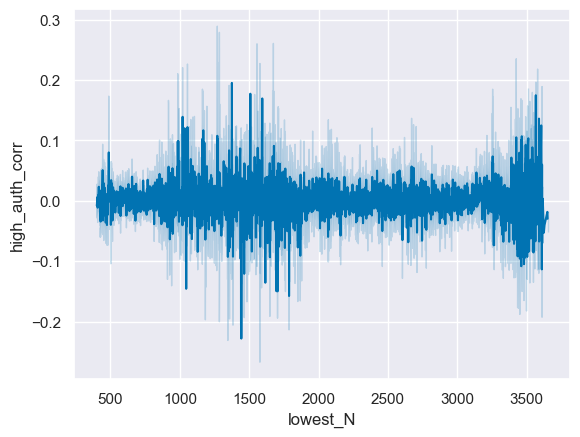

In [582]:
sns.lineplot(store2[noise_filter],x="lowest_N",y="high_auth_corr");
# lowest_N >=400

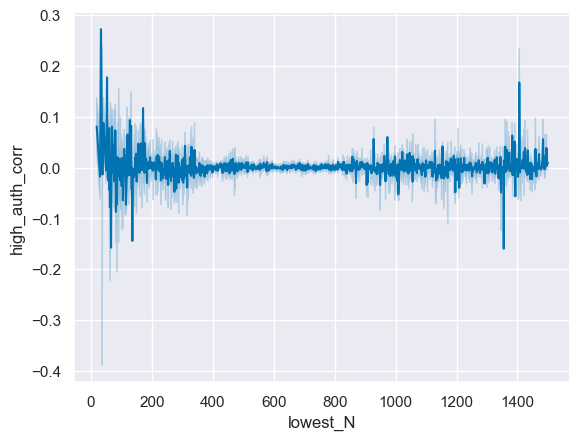

In [583]:
sns.lineplot(store2[(store2["lowest_var"]<.15)&(store2["lowest_N"]<1500)],x="lowest_N",y="high_auth_corr");

In [460]:
# ord_var_found = store2["demo_var"].apply(lambda x: "__" in x)|store2["att_var"].apply(lambda x: "__" in x)

In [8]:
# ord_var_found.sum()


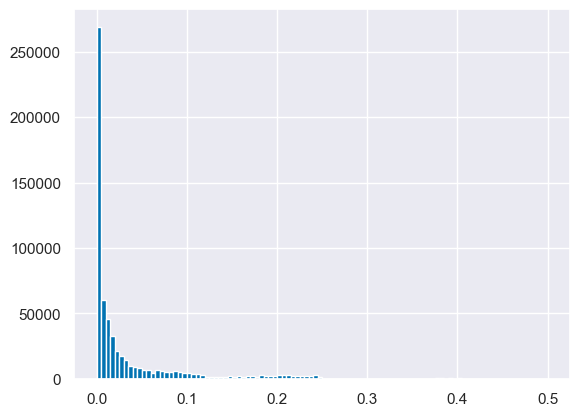

In [587]:
store2[store2["lowest_var"]<.5]["lowest_var"].hist(bins=100);

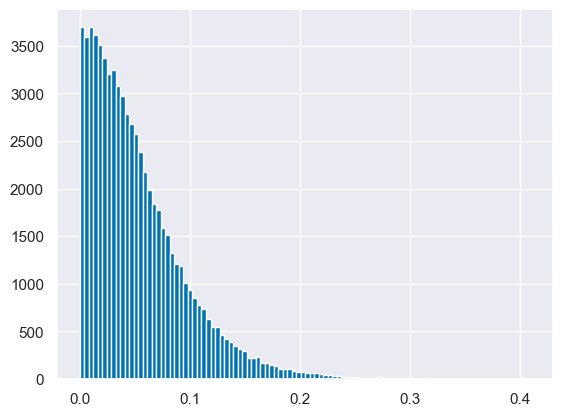

In [586]:
store2[noise_filter]["corr_gap_abs"].hist(bins=100);

In [590]:
noise_filter = (store2["lowest_var"]>.12)&(store2["lowest_N"]>200)
store2[noise_filter&(store2["corr_gap_abs"]>=.2)].sort_values(by="corr_gap_abs",ascending=False).head(50)
#[50:]["att_var"].apply(lambda x: x.split("W")[0]).value_counts().head(50)
#.value_counts()

demo_var  \
705442                                   ageGroupW25__66+   
705281                                             ageW25   
634029                                             ageW23   
396519                                             ageW16   
396669                                   ageGroupW16__66+   
634152                                   ageGroupW23__66+   
705304                                             ageW25   
569282                                   ageGroupW21__66+   
569128                                             ageW21   
422100                                             ageW17   
705465                                   ageGroupW25__66+   
569090                                             ageW21   
422255                                   ageGroupW17__66+   
569244                                   ageGroupW21__66+   
517731                           resourceAccess3_5W20_Yes   
420992                          discussPolDaysW17__7 days   
468246                                 polSocMediaW19_Yes   
528216                                             ageW20   
634067                                             ageW23   
422097                                             ageW17   
528402                                   ageGroupW20__66+   
254646                          discussPolDaysW11__7 days   
517819                           resourceAccess3_5W20_Yes   
422252                                   ageGroupW17__66+   
467016              infoSourcePaperW19__More than 2 hours   
602400                                             ageW22   
447264                                      agreePartyW18   
528365                                   ageGroupW20__66+   
602525                                   ageGroupW22__66+   
528179                                             ageW20   
420957                          discussPolDaysW17__7 days   
688667                    speakWelshW1_W25__Yes, fluently   
254654                          discussPolDaysW11__7 days   
556220                            selfOccSuperviseW21_Yes   
517729                           resourceAccess3_5W20_Yes   
420946                          discussPolDaysW17__7 days   
634190                                   ageGroupW23__66+   
180411                           normEUW8__Strongly agree   
128779            infoSourceInternetW6__More than 2 hours   
362925                                             ageW15   
363140                                   ageGroupW15__66+   
380794  p_religionW15_No, I do not regard myself as be...   
467308           infoSourceInternetW19__More than 2 hours   
528390                                   ageGroupW20__66+   
528204                                             ageW20   
453121     selfOccOrgSizeW16W17W18__500 or more employees   
254618                          discussPolDaysW11__7 days   
154617                                    ageGroupW7__66+   
353046      partyMemberW15__Yes, I am a member of a party   
468222                                 polSocMediaW19_Yes   

                                                  att_var  high_auth_corr  \
705442            europeannessW25__Very strongly European       -0.165132   
705281            europeannessW25__Very strongly European       -0.162215   
634029            europeannessW23__Very strongly European       -0.115826   
396519      dealPriorityTradeDealW16__Extremely important        0.186469   
396669      dealPriorityTradeDealW16__Extremely important        0.184386   
634152            europeannessW23__Very strongly European       -0.112277   
705304                      cwLanguageW25__Strongly agree       -0.102114   
569282            europeannessW21__Very strongly European       -0.134032   
569128            europeannessW21__Very strongly European       -0.134607   
422100                       populism1W17__Strongly agree        0.158084   
705465                      cwLanguageW25__Strongly agree       -0.085047   
569090       

In [591]:
# worth saving
store2.to_pickle("E:\\BES_analysis_data\\store2.zip",compression='zip')

In [571]:
store2[noise_filter&(store2["corr_gap_abs"]>=.2)].sort_values(by="corr_gap_abs",ascending=False)[50:]["att_var"].apply(lambda x: x.split("W")[0]).value_counts().head(50)
#.value_counts()

att_var
riskUnemployment              35
europeanness                  32
changeEconomy                 27
lr1                           25
econGenRetro                  21
populism1                     17
lr_scale                      15
al1                           15
econGenProsp                  15
lr3                           14
EUIntegrationSelf             13
deficitReduce                 13
redistSelf                    13
effectsEUTrade                13
cutsTooFarNational            12
effectsEUFinance              10
cutsTooFarLocal               10
effectsEUImmigration           9
LRAL_mii_cat                   9
dealPriorityRedTape            9
EconSecurityFuture             9
cutsTooFarNHS                  8
effectsEUEcon                  8
welfarePreferenceExp           8
preferMP                       8
scotFairShare                  7
grammar                        7
efficacyNoMatter               7
freeSpeechMilitaryElection     6
polAttention                   6
po

In [563]:
store2[noise_filter&(store2["corr_gap_abs"]>=.2)].sort_values(by="corr_gap_abs",ascending=False)[50:].head(50)

demo_var  \
616219                                             ageW22   
458619                                      agreePartyW18   
30161                                  dv1w2W2__Very sure   
540808                                   ageGroupW20__66+   
616349                                   ageGroupW22__66+   
540619                                             ageW20   
430891                          discussPolDaysW17__7 days   
262449                          discussPolDaysW11__7 days   
30374       dv2w2W2__Should definitely become independent   
678954                voterIDDifficultW25__Strongly agree   
530001                           resourceAccess3_5W20_Yes   
430880                          discussPolDaysW17__7 days   
648681                                   ageGroupW23__66+   
187016                           normEUW8__Strongly agree   
134327            infoSourceInternetW6__More than 2 hours   
372181                                             ageW15   
372398                                   ageGroupW15__66+   
390216  p_religionW15_No, I do not regard myself as be...   
479290           infoSourceInternetW19__More than 2 hours   
540833                                   ageGroupW20__66+   
540644                                             ageW20   
262413                          discussPolDaysW11__7 days   
160417                                    ageGroupW7__66+   
480204                                 polSocMediaW19_Yes   
160224                                              ageW7   
86134                            discussPolDaysW4__7 days   
236446                                   ageGroupW10__66+   
262437                          discussPolDaysW11__7 days   
430924                          discussPolDaysW17__7 days   
678665                    voterIDFraudW25__Strongly agree   
565787                             p_edlevelW20__Postgrad   
582141                                             ageW21   
635289                      homeOwn2W23_I own it outright   
480208                                 polSocMediaW19_Yes   
540611                                             ageW20   
196452                                    ageGroupW8__66+   
160533                                    ageGroupW7__66+   
236259                                             ageW10   
430926                          discussPolDaysW17__7 days   
735648                                    p_parentW25_Yes   
678323                voterIDSupportW25__Strongly support   
196310                                              ageW8   
540800                                   ageGroupW20__66+   
372184                                             ageW15   
430955                          discussPolDaysW17__7 days   
678322                voterIDSupportW25__Strongly support   
526853  anyUniW20__Yes, I graduated from higher education   
160340                                              ageW7   
153783                                  euSources_2W7_Yes   
406117                                             ageW16   

                                                  att_var  high_auth_corr  \
616219            europeannessW22__Very strongly European       -0.115695   
458619     EUIntegrationSelfW18__Protect our independence        0.120719   
30161                trustYourMPW2__A great deal of trust        0.024866   
540808  workHomeCoronaSelfW20__I already regularly wor...       -0.104298   
616349            europeannessW22__Very strongly European       -0.114762   
540619  workHomeCoronaSelfW20__I already regularly wor...       -0.101481   
430891                  econGenRetroW17__Got a lot better        0.157449   
262449             changeEconomyW11__Getting a lot better        0.121100   
30374              changeCrimeLabW2__Getting a lot higher       -0.135061   
678954                efficacyNoMatterW25__Strongly agree        0.167317   
530001  redistSelfW20__Government should be less conce...        0.195456   
430880       

In [ ]:
## cleanup

# check category overlap
# dv2w2W2__Should definitely become independent
# dv1w2W2__Very sure
# changeEducationLab

In [385]:
store[ord_var_found][(store["lowest_N"]>=500)&(store["corr_gap_abs"]>=.2)].sort_values(by="corr_gap_abs",ascending=False).head(50)#["att_var"].value_counts().head(50)

demo_var  \
483868                    voterIDFraudW25__Strongly agree   
308549                                   ageGroupW17__66+   
483760                voterIDConfidentW25__Strongly agree   
483652                voterIDSupportW25__Strongly support   
502904                                   ageGroupW25__66+   
502796                                             ageW25   
483681                voterIDSupportW25__Strongly support   
457510                                             ageW23   
457617                                   ageGroupW23__66+   
483897                    voterIDFraudW25__Strongly agree   
483890                    voterIDFraudW25__Strongly agree   
408601                                   ageGroupW21__66+   
408475                                             ageW21   
308473                                             ageW17   
483789                voterIDConfidentW25__Strongly agree   
408436                                             ageW21   
308606                                   ageGroupW17__66+   
483674                voterIDSupportW25__Strongly support   
408562                                   ageGroupW21__66+   
372479                           resourceAccess3_5W20_Yes   
307798                          discussPolDaysW17__7 days   
483782                voterIDConfidentW25__Strongly agree   
193831                          discussPolDaysW11__7 days   
372520                           resourceAccess3_5W20_Yes   
483882                    voterIDFraudW25__Strongly agree   
346706              infoSourcePaperW19__More than 2 hours   
434544                                             ageW22   
380176                                   ageGroupW20__66+   
434646                                   ageGroupW22__66+   
380039                                             ageW20   
307762                          discussPolDaysW17__7 days   
193838                          discussPolDaysW11__7 days   
98403                        nonelecParticipation_6W6_Yes   
484117                voterIDDifficultW25__Strongly agree   
372477                           resourceAccess3_5W20_Yes   
280873  p_religionW15_Yes - Presbyterian/Church of Sco...   
380187                                   ageGroupW20__66+   
380050                                             ageW20   
193810                          discussPolDaysW11__7 days   
121081                                    ageGroupW7__66+   
35576                         p_paper_readW2_The Guardian   
120945                                              ageW7   
340902                          p_paper_readW18_The Times   
175357                                   ageGroupW10__66+   
193827                          discussPolDaysW11__7 days   
7092                          p_paper_readW1_The Guardian   
307791                          discussPolDaysW17__7 days   
408438                                             ageW21   
186880  p_religionW10_Yes - Presbyterian/Church of Sco...   
380032                                             ageW20   

                                                  att_var  high_auth_corr  \
483868     polAttentionW25__Pay a great deal of attention        0.165792   
308549  mpVoteConstSelfW17_MP should vote according to...        0.213864   
483760     polAttentionW25__Pay a great deal of attention        0.185442   
483652     polAttentionW25__Pay a great deal of attention        0.168782   
502904            europeannessW25__Very strongly European       -0.165132   
502796            europeannessW25__Very strongly European       -0.162215   
483681              efficacyUnderstandW25__Strongly agree        0.131180   
457510            europeannessW23__Very strongly European       -0.115826   
457617            europeannessW23__Very strongly European       -0.112277   
483897              efficacyUnderstandW25__Strongly agree        0.129758   
483890  taxSpendSelfW25__Government should increase ta...        0.048728   
408601       

In [ ]:
# lr1,lr3,lr_scale,populism1,populism6,immigEcon,immigSelf
# riskUnemployment,europeanness,cutsTooFarNational,efficacyNoMatter,


# changeEducationLab!changeNHSLab

In [ ]:
# demo vars

#age,voterID,discussPolDays,infoSource,
#resourceAccess3_5,nonelecParticipation_7,nonelecParticipation_2,participation_5,statusActivities1_17,participation_1
# p_paper_readW1_The Mirror / Daily Record,p_paper_readW1_The Guardian
# partyMember?

In [ ]:
voterIDFraudW25__Strongly agree	polAttentionW25__Pay a great deal of attention	0.165792	-0.305334	867	864	0.471126	0.471126	
voterIDConfidentW25__Strongly agree	polAttentionW25__Pay a great deal of attention	0.185442	-0.246041	868	870	0.431484	0.431484
voterIDSupportW25__Strongly support	polAttentionW25__Pay a great deal of attention	0.168782	-0.255756	3434	3398	0.424539	0.42453
voterIDSupportW25__Strongly support	efficacyUnderstandW25__Strongly agree	0.131180	-0.252294	3352	3370	0.383474	0.383474
voterIDFraudW25__Strongly agree	efficacyUnderstandW25__Strongly agree	0.129758	-0.227280	845	856	0.357038	0.357038	
voterIDFraudW25__Strongly agree	taxSpendSelfW25__Government should increase ta...	0.048728	-0.304145	811	848	0.352873	0.352873	
ageW17	populism1W17__Strongly agree	0.158084	-0.179836	1044	807	0.337920	0.337920

ageW17	mpVoteConstSelfW17_MP should vote according to...	0.218652	-0.217983	3985	2781	0.436635	0.436635
ageW25	europeannessW25__Very strongly European	-0.162215	0.245313	3382	3375	-0.407529	0.407529

p_housingW17_Own outright	mpVoteConstSelfW17_MP should vote according to
p_work_statW17_Retired	mpVoteConstSelfW17_MP should vote according to.

discussPolDaysW17__7 days	changeEconomyW17__Getting a lot better

infoSourcePaperW19__More than 2 hours	econGenProspW19__Get a lot better

resourceAccess3_5W20_Yes	lr_scaleW20__Right

ageW21	changeEconomyW21__Getting a lot better

p_paper_readW2_The Guardian	scottishnessW2__Very strongly Scottish

resourceAccess3_5W20_Yes	redistSelfW20__Government should be less conce..

infoSourcePaperW19__More than 2 hours	econGenProspW19__Get a lot better

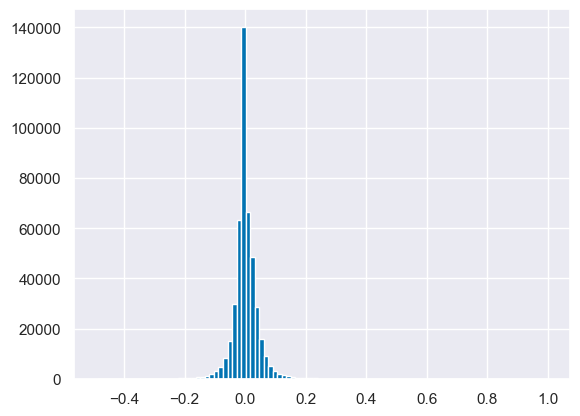

In [354]:
store["low_auth_corr"].hist(bins=100);

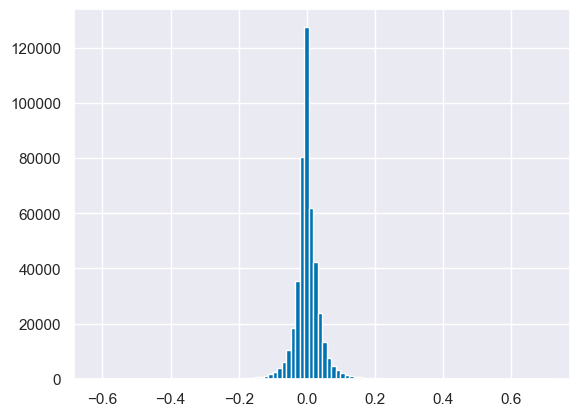

In [353]:
store["high_auth_corr"].hist(bins=100);

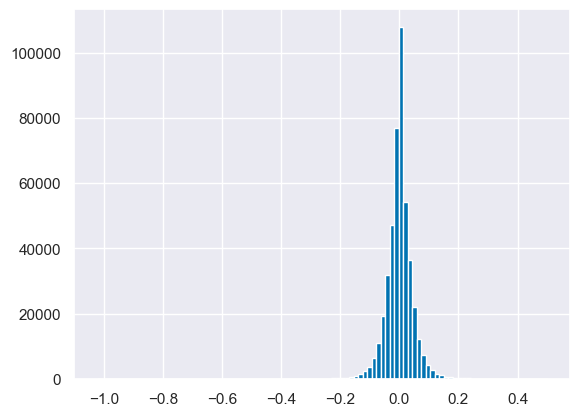

In [357]:
store["corr_gap"].hist(bins=100);

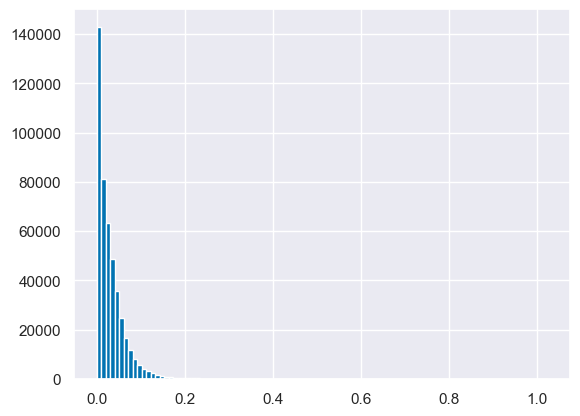

In [358]:
store["corr_gap_abs"].hist(bins=100);

In [355]:
var_type["var_cat"].value_counts()

var_cat
political      5300
demographic    1590
attitudinal    1572
logistic        135
Name: count, dtype: int64

In [223]:
search(BES_Panel,"al_scale")

al_scaleW1_W5      38260
al_scaleW6         27288
al_scaleW7_W9      35873
al_scaleW10_W12    30088
al_scaleW13        27252
al_scaleW14W15     31629
al_scaleW16        32671
al_scaleW17_W19    29773
al_scaleW20        26914
al_scaleW21        25692
al_scaleW22        23617
al_scaleW23        26399
al_scaleW24        12652
al_scaleW25        26208
dtype: int64

In [222]:
var_type["specific_wave"].value_counts(dropna=False).sort_index()

specific_wave
1.0     379
2.0     489
3.0     469
4.0     630
5.0     272
6.0     442
7.0     518
8.0     414
9.0     260
10.0    334
11.0    422
12.0    373
13.0    298
14.0    432
15.0    434
16.0    415
17.0    476
18.0    564
19.0    383
20.0    431
21.0    499
22.0    293
23.0    432
24.0    107
25.0    537
NaN      62
Name: count, dtype: int64

In [218]:
var_type["specific_wave"] = var_type["varname"].apply(lambda x: int(re.match(".*W(\d+)$",x).groups()[0]) if re.match(".*W(\d+)$",x) is not None else np.nan)

In [ ]:
##########################################################################################
# Replicate specific charts
##########################################################################################

In [230]:
search(BES_Panel,"p_gross_householdW25|al_scaleW25|lr_scaleW25|wt_new_W25")

wt_new_W25              30407
lr_scaleW25             26932
al_scaleW25             26208
p_gross_householdW25    30175
dtype: int64

In [232]:
search(BES_reduced_with_na,"p_gross_householdW25|al_scaleW25|lr_scaleW25|wt_new_W25")

lr_scaleW25__Right                         26932
al_scaleW25__Authoritarian                 26208
p_gross_householdW25__£150,000 and over    22386
dtype: int64

In [ ]:
# p_gross_householdW25

<AxesSubplot:xlabel='p_gross_householdW25__£150,000 and over', ylabel='lr_scaleW25__Right'>

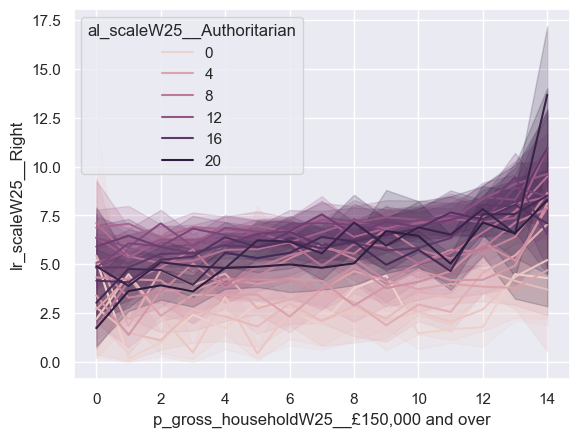

In [233]:
sns.lineplot(data = BES_reduced_with_na, x="p_gross_householdW25__£150,000 and over",y="lr_scaleW25__Right",hue="al_scaleW25__Authoritarian")

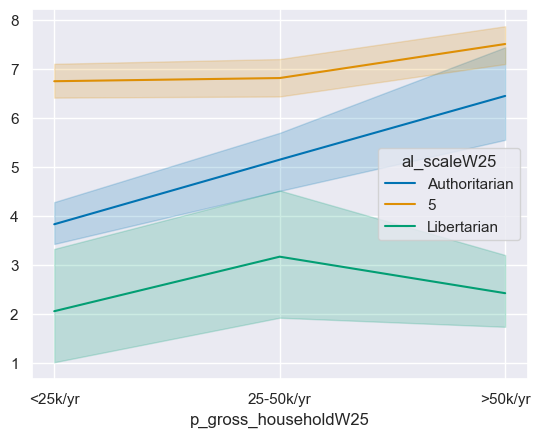

In [24]:
sns.lineplot(x=p_gross_hhold,
             y=BES_Panel["lr_scaleW25"].cat.codes.replace(-1,np.nan),
             hue=BES_Panel["al_scaleW25"].astype('object').replace(al_scale_replace_dict));

In [13]:
import statsmodels.formula.api as smf
# model = smf.ols("mpg ~ hp * wt * am", data = mtcars).fit()

In [ ]:
## controls
# 5 category education variable - weird - edlevel is 6 categories?
# age
# left-right if it's not the dependent variable

# all a bit problematic as controls!

In [86]:
BES_Panel["al_scaleW25"].cat.categories

al_scale_replace_dict = {'Libertarian':'Libertarian',             0.5:np.nan,             '1':np.nan,             1.5:np.nan,
                   '2':np.nan,             2.5:np.nan,             '3':np.nan,             3.5:np.nan,
                   '4':np.nan,             4.5:np.nan,
                         '5':"5",
                         5.5:np.nan,
                   '6':np.nan,             6.5:np.nan,             '7':np.nan,             7.5:np.nan,
                   '8':np.nan,             8.5:np.nan,             '9':np.nan,             9.5:np.nan,
       'Authoritarian':'Authoritarian'}

BES_Panel["al_scaleW25"].astype('object').replace(al_scale_replace_dict)

BES_Panel["p_gross_householdW25"].cat.categories

inc_replace_dict = {'under Â£5,000 per year':"<25k/yr", 'Â£5,000 to Â£9,999 per year':"<25k/yr",
       'Â£10,000 to Â£14,999 per year':"<25k/yr", 'Â£15,000 to Â£19,999 per year':"<25k/yr",
       'Â£20,000 to Â£24,999 per year':"<25k/yr", 'Â£25,000 to Â£29,999 per year':"25-50k/yr",
       'Â£30,000 to Â£34,999 per year':"25-50k/yr", 'Â£35,000 to Â£39,999 per year':"25-50k/yr",
       'Â£40,000 to Â£44,999 per year':"25-50k/yr", 'Â£45,000 to Â£49,999 per year':"25-50k/yr",
       'Â£50,000 to Â£59,999 per year':">50k/yr", 'Â£60,000 to Â£69,999 per year':">50k/yr",
       'Â£70,000 to Â£99,999 per year':">50k/yr", 'Â£100,000 to Â£149,999 per year':">50k/yr",
       'Â£150,000 and over':">50k/yr", "Don't know":np.nan, "Prefer not to answer":np.nan}

p_gross_hhold = BES_Panel["p_gross_householdW25"].astype('object').replace(inc_replace_dict).astype('category').cat.reorder_categories(["<25k/yr","25-50k/yr",">50k/yr"])
p_gross_hhold

## edlevelUni better - technical/prof/quals -> A-level/undergrad equivalents
BES_Panel["p_edlevelUniW25"].cat.categories

ed_cat_replace_dict={'No qualifications':"<GCSE/NoQual", 'Below GCSE':"<GCSE/NoQual", 'GCSE':"GCSE",
                     'A-level':"A-Level", 'Undergraduate':"Undergrad",
       'Postgrad':"Postgrad"}

edlevel_5cat = BES_Panel["p_edlevelUniW25"].replace(ed_cat_replace_dict).astype('category')\
    .cat.reorder_categories(["<GCSE/NoQual","GCSE","A-Level","Undergrad","Postgrad"])


data = pd.DataFrame()
data["p_gross_hhold"] = p_gross_hhold
data["al_scale"] = BES_Panel["al_scaleW25"].cat.codes.replace(-1,np.nan)
data["age"] = BES_Panel["ageW25"].astype('float')
data["edlevel"] = edlevel_5cat
data["lr_scale"] = BES_Panel["lr_scaleW25"].cat.codes.replace(-1,np.nan)
data["p_gross_hhold_lin"] = BES_Panel["p_gross_householdW25"].replace("Don't know",np.nan).replace("Prefer not to answer",np.nan).cat.codes.replace(-1,np.nan)

# data = pd.concat([p_gross_hhold,BES_Panel["lr_scaleW25"].cat.codes.replace(-1,np.nan),BES_Panel["al_scaleW25"].replace(al_scale_replace_dict)])

data

p_gross_hhold  al_scale   age  edlevel  lr_scale  p_gross_hhold_lin
id                                                                        
1                NaN       NaN   NaN      NaN       NaN                NaN
2                NaN       NaN   NaN      NaN       NaN                NaN
3                NaN       NaN   NaN      NaN       NaN                NaN
4                NaN       NaN   NaN      NaN       NaN                NaN
5                NaN       NaN   NaN      NaN       NaN                NaN
...              ...       ...   ...      ...       ...                ...
113062     25-50k/yr      16.0  32.0     GCSE       2.0                6.0
113063           NaN       NaN  24.0     GCSE       NaN                NaN
113064           NaN       NaN  21.0  A-Level       7.0                NaN
113065           NaN       2.0  20.0  A-Level       0.0                NaN
113066           NaN      11.0  36.0     GCSE       3.0                NaN

[111621 rows x 6 columns]

In [32]:
import statsmodels.formula.api as smf
model = smf.ols("lr_scale ~ al_scale * p_gross_hhold_lin + age + edlevel", data = data).fit()

In [33]:
model.params

Intercept                     2.382370
edlevel[T.GCSE]               0.089577
edlevel[T.A-Level]            0.337952
edlevel[T.Undergrad]          0.398300
edlevel[T.Postgrad]           0.298751
al_scale                     -0.006212
p_gross_hhold_lin            -0.021074
al_scale:p_gross_hhold_lin    0.017861
age                           0.037711
dtype: float64

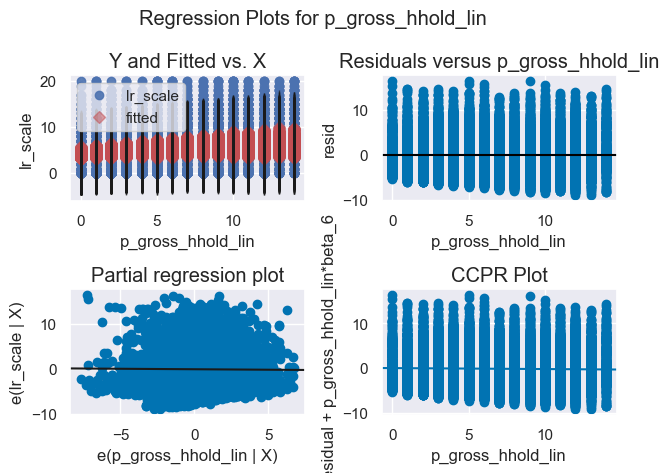

In [34]:
import statsmodels.api as sm
fig = sm.graphics.plot_regress_exog(model, "p_gross_hhold_lin")
fig.tight_layout(pad=1.0)

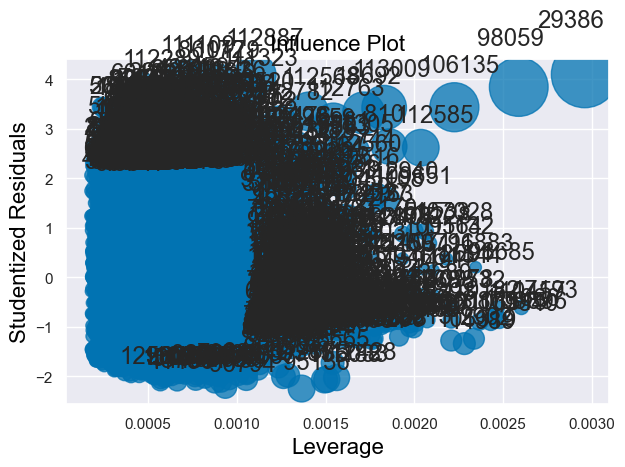

In [36]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

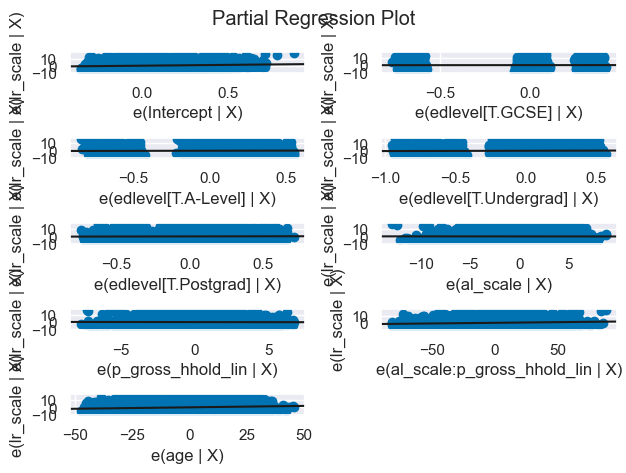

In [37]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

In [39]:
from sklearn.inspection import PartialDependenceDisplay

In [85]:
# data["al_scale"].value_counts().sort_index()

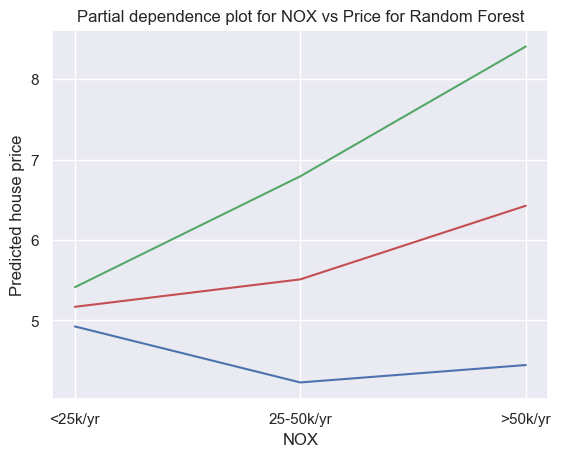

In [87]:
model = smf.ols("lr_scale ~ al_scale * p_gross_hhold + age + edlevel", data = data).fit()
# rf_model = RandomForestRegressor(n_estimators=100).fit(X, y)

# p_gross_hhold_values = np.linspace(np.min(data['p_gross_hhold']), np.max(X['NOX']))
p_gross_hhold_values =['<25k/yr', '25-50k/yr', '>50k/yr']

auth_pal = {0:'b',10:'r',20:'g'}

for auth in [0,10,20]:
    pdp_values = []
    for n in p_gross_hhold_values:
        X_pdp = data.copy()
        X_pdp['p_gross_hhold'] = n
        X_pdp['al_scale'] = auth
        pred = model.predict(X_pdp)
#         print(pred)
        pdp_values.append(np.mean(pred))

    plt.plot(p_gross_hhold_values, pdp_values,c=auth_pal[auth])
plt.ylabel('Predicted house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

In [66]:
## they use wave 13

id
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
           ...   
113062    5.25027
113063        NaN
113064        NaN
113065        NaN
113066        NaN
Length: 111621, dtype: float64

In [88]:
search(BES_Panel,"al_scaleW13|lr_scaleW13|p_gross_householdW13|p_edlevelUniW13|ageW13|wt_new_W13_result")

# Step 1 - redo with Wave 13 data
# Step 2 - use sample weights (I think WLS!)

wt_new_W13W16           14647
wt_new_W13_result       31135
wt_new_W13W17           15744
wt_new_W13_W19           5861
wt_new_W13W19           15811
wt_new_W13W14           20393
competentFarageW13      15695
lr_scaleW13             28064
al_scaleW13             27252
ageW13                  31135
p_gross_householdW13    30925
p_education_ageW13      30739
p_edlevelUniW13         29084
dtype: int64

In [96]:
BES_Panel["al_scaleW13"].cat.categories

al_scale_replace_dict = {'Libertarian':'Libertarian',             0.5:np.nan,             '1':np.nan,             1.5:np.nan,
                   '2':np.nan,             2.5:np.nan,             '3':np.nan,             3.5:np.nan,
                   '4':np.nan,             4.5:np.nan,
                         '5':"5",
                         5.5:np.nan,
                   '6':np.nan,             6.5:np.nan,             '7':np.nan,             7.5:np.nan,
                   '8':np.nan,             8.5:np.nan,             '9':np.nan,             9.5:np.nan,
       'Authoritarian':'Authoritarian'}

BES_Panel["al_scaleW13"].astype('object').replace(al_scale_replace_dict)

BES_Panel["p_gross_householdW13"].cat.categories

inc_replace_dict = {'under Â£5,000 per year':"<25k/yr", 'Â£5,000 to Â£9,999 per year':"<25k/yr",
       'Â£10,000 to Â£14,999 per year':"<25k/yr", 'Â£15,000 to Â£19,999 per year':"<25k/yr",
       'Â£20,000 to Â£24,999 per year':"<25k/yr", 'Â£25,000 to Â£29,999 per year':"25-50k/yr",
       'Â£30,000 to Â£34,999 per year':"25-50k/yr", 'Â£35,000 to Â£39,999 per year':"25-50k/yr",
       'Â£40,000 to Â£44,999 per year':"25-50k/yr", 'Â£45,000 to Â£49,999 per year':"25-50k/yr",
       'Â£50,000 to Â£59,999 per year':">50k/yr", 'Â£60,000 to Â£69,999 per year':">50k/yr",
       'Â£70,000 to Â£99,999 per year':">50k/yr", 'Â£100,000 to Â£149,999 per year':">50k/yr",
       'Â£150,000 and over':">50k/yr", "Don't know":np.nan, "Prefer not to answer":np.nan}

p_gross_hhold = BES_Panel["p_gross_householdW13"].astype('object').replace(inc_replace_dict).astype('category').cat.reorder_categories(["<25k/yr","25-50k/yr",">50k/yr"])
p_gross_hhold

## edlevelUni better - technical/prof/quals -> A-level/undergrad equivalents
BES_Panel["p_edlevelUniW13"].cat.categories

ed_cat_replace_dict={'No qualifications':"<GCSE/NoQual", 'Below GCSE':"<GCSE/NoQual", 'GCSE':"GCSE",
                     'A-level':"A-Level", 'Undergraduate':"Undergrad",
       'Postgrad':"Postgrad"}

edlevel_5cat = BES_Panel["p_edlevelUniW13"].replace(ed_cat_replace_dict).astype('category')\
    .cat.reorder_categories(["<GCSE/NoQual","GCSE","A-Level","Undergrad","Postgrad"])


data = pd.DataFrame()
data["p_gross_hhold"] = p_gross_hhold
data["al_scale"] = BES_Panel["al_scaleW13"].cat.codes.replace(-1,np.nan)
data["age"] = BES_Panel["ageW13"].astype('float')
data["edlevel"] = edlevel_5cat
data["lr_scale"] = BES_Panel["lr_scaleW13"].cat.codes.replace(-1,np.nan)/2
data["p_gross_hhold_lin"] = BES_Panel["p_gross_householdW13"].replace("Don't know",np.nan).replace("Prefer not to answer",np.nan).cat.codes.replace(-1,np.nan)
data["wt"]= BES_Panel["wt_new_W13_result"]

# data = pd.concat([p_gross_hhold,BES_Panel["lr_scaleW25"].cat.codes.replace(-1,np.nan),BES_Panel["al_scaleW25"].replace(al_scale_replace_dict)])

data

p_gross_hhold  al_scale   age    edlevel  lr_scale  p_gross_hhold_lin  \
id                                                                             
1                NaN       NaN   NaN        NaN       NaN                NaN   
2            >50k/yr       9.0  65.0  Undergrad       4.5               12.0   
3            <25k/yr      14.0  79.0    A-Level       2.5                1.0   
4                NaN       NaN   NaN        NaN       NaN                NaN   
5                NaN       NaN   NaN        NaN       NaN                NaN   
...              ...       ...   ...        ...       ...                ...   
113062           NaN       NaN   NaN        NaN       NaN                NaN   
113063           NaN       NaN   NaN        NaN       NaN                NaN   
113064           NaN       NaN   NaN        NaN       NaN                NaN   
113065           NaN       NaN   NaN        NaN       NaN                NaN   
113066           NaN       NaN   NaN        NaN       NaN                NaN   

              wt  
id                
1            NaN  
2       0.704318  
3       0.409886  
4            NaN  
5            NaN  
...          ...  
113062       NaN  
113063       NaN  
113064       NaN  
113065       NaN  
113066       NaN  

[111621 rows x 7 columns]

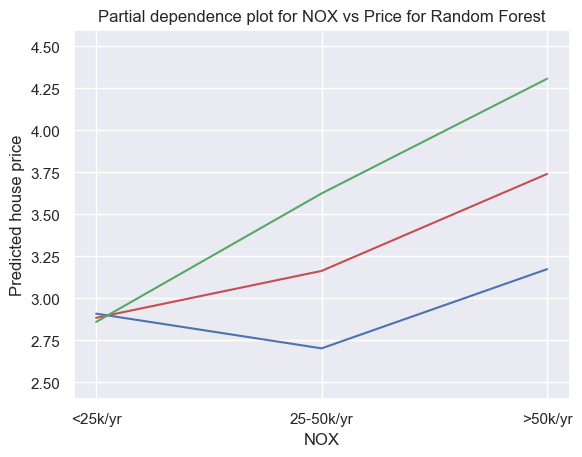

In [97]:
model = smf.ols("lr_scale ~ al_scale * p_gross_hhold + age + edlevel", data = data).fit()
model = smf.wls("lr_scale ~ al_scale * p_gross_hhold + age + edlevel", data = data, weights=data["wt"]).fit()
# rf_model = RandomForestRegressor(n_estimators=100).fit(X, y)

# p_gross_hhold_values = np.linspace(np.min(data['p_gross_hhold']), np.max(X['NOX']))
p_gross_hhold_values =['<25k/yr', '25-50k/yr', '>50k/yr']

auth_pal = {0:'b',10:'r',20:'g'}

for auth in [0,10,20]:
    pdp_values = []
    for n in p_gross_hhold_values:
        X_pdp = data.copy()
        X_pdp['p_gross_hhold'] = n
        X_pdp['al_scale'] = auth
        pred = model.predict(X_pdp)
#         print(pred)
        pdp_values.append(np.mean(pred))

    plt.plot(p_gross_hhold_values, pdp_values,c=auth_pal[auth])
plt.ylim([2.4,4.6]);
plt.ylabel('Predicted house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

In [ ]:
##################################################

In [3]:
store2 = pd.read_pickle("E:\\BES_analysis_data\\store2.zip",compression='zip')

In [124]:
noise_filter = (store2["lowest_var"]>.12)&(store2["lowest_N"]>200)
store2[noise_filter&(store2["corr_gap_abs"]>=.2)].sort_values(by="corr_gap_abs",ascending=False)["att_var"].value_counts().head(50)

att_var
econGenProspW19__Get a lot better                                        8
cwLanguageW25__Strongly agree                                            8
populism1W17__Strongly agree                                             7
riskUnemploymentW25__Very likely                                         7
lr1W17_W19__Strongly agree                                               6
econGenRetroW12__Got a lot better                                        6
europeannessW21__Very strongly European                                  6
freeSpeechMilitaryElectionW15__Definitely                                6
EconSecurityFutureW25__A lot worse                                       6
econPersonalProspW19__Get a lot better                                   5
europeannessW25__Very strongly European                                  5
populism6W7__Strongly agree                                              5
preferMPWomenW6__A lot more                                              5
trustWestminsterW

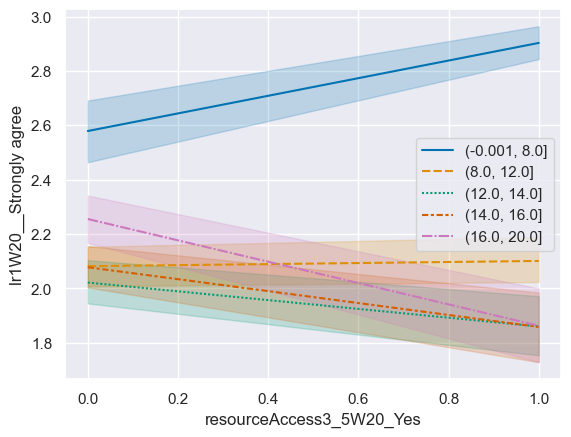

In [38]:
var1 = "resourceAccess3_5W20_Yes"
var2 = "lr1W20__Strongly agree"
wave = 20
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));

# Do you personally know anyone who knows a lot about the following things and who you could reach
# on short notice, say within a week? <<br/>>Do you personally know someone who...? Tick all that
# apply
# resourceAccess3_5 ○ Discuss politics with you

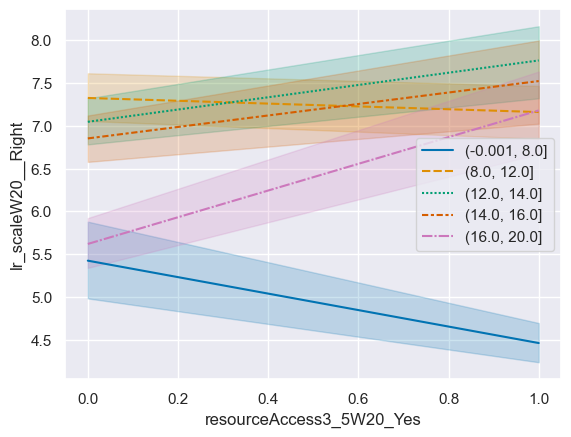

In [73]:
var1 = "resourceAccess3_5W20_Yes"
var2 = "lr_scaleW20__Right"
wave = 20
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));

# Do you personally know anyone who knows a lot about the following things and who you could reach
# on short notice, say within a week? <<br/>>Do you personally know someone who...? Tick all that
# apply
# resourceAccess3_5 ○ Discuss politics with you

123.0

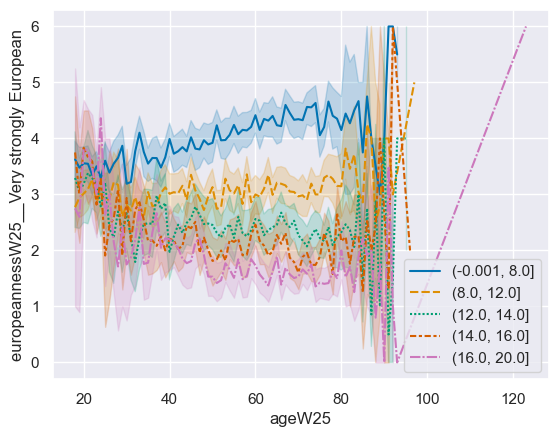

In [39]:
# ageW25	europeannessW25__Very strongly European	
var2 = "europeannessW25__Very strongly European"
var1 = "ageW25"
wave = 25
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));

BES_Panel["ageW25"].max()#! 123 bullshit

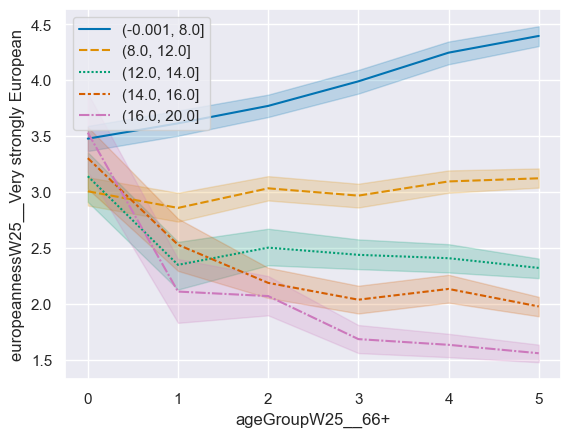

In [40]:
# ageGroupW25__66+	europeannessW25__Very strongly European
var2 = "europeannessW25__Very strongly European"
var1 = "ageGroupW25__66+"
wave = 25
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));

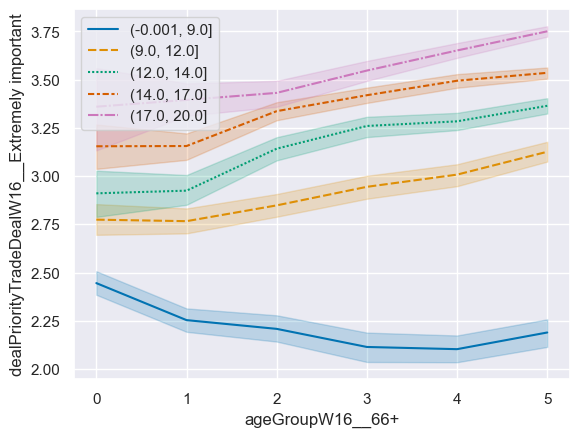

In [41]:
# ageGroupW16__66+	dealPriorityTradeDealW16__Extremely important	
var2 = "dealPriorityTradeDealW16__Extremely important"
var1 = "ageGroupW16__66+"
wave = 16
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));

# dealPriorityTradeDeal Allowing Britain to make its own trade deals with other countries

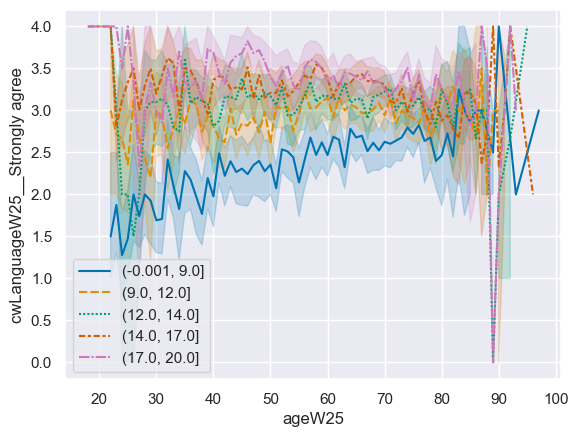

In [49]:
# ageW25	cwLanguageW25__Strongly agree
var2 = "cwLanguageW25__Strongly agree"
var1 = "ageW25"
wave = 25
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# cwLanguage Too many people are easily offended these days over the language that others use

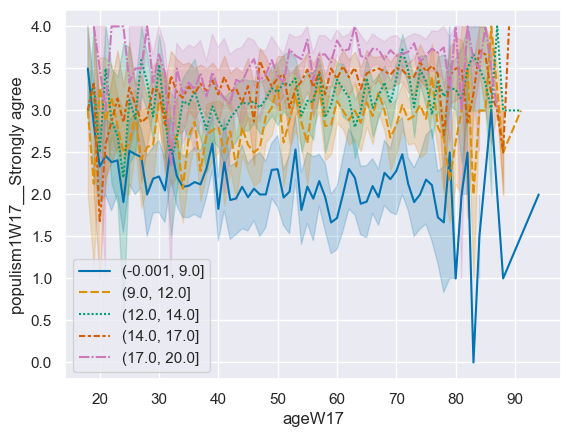

In [50]:
var2 = "populism1W17__Strongly agree"
var1 = "ageW17"
wave = 17
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# populism1 The politicians in the UK Parliament need to follow the will of the people

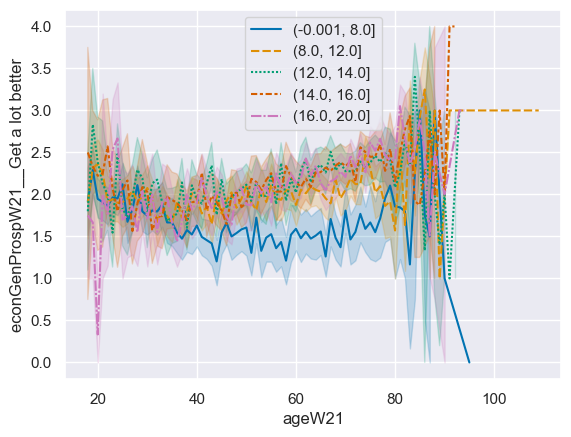

In [71]:
var2 = "econGenProspW21__Get a lot better"
var1 = "ageW21"
wave = 21
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# econGenProsp General economic situation in this country

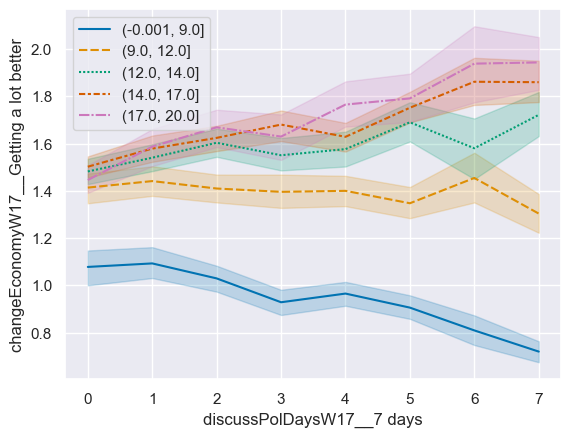

In [52]:
var2 = "changeEconomyW17__Getting a lot better"
var1 = "discussPolDaysW17__7 days"
wave = 17
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# During the last week, roughly on how many days did you talk about politics parties with other people?

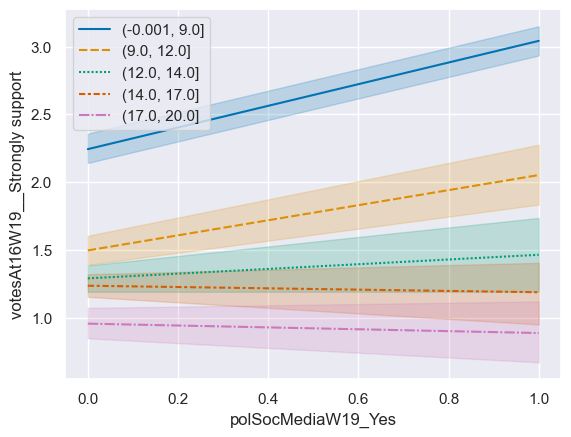

In [53]:
var2 = "votesAt16W19__Strongly support"
var1 = "polSocMediaW19_Yes"
wave = 19
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# During the 2019 General Election campaign, have you posted anything political on your social media?

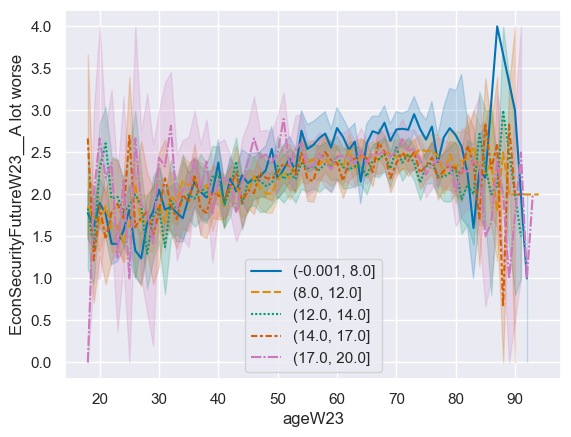

In [72]:
var2 = "EconSecurityFutureW23__A lot worse"
var1 = "ageW23"
wave = 23
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# During the 2019 General Election campaign, have you posted anything political on your social media?

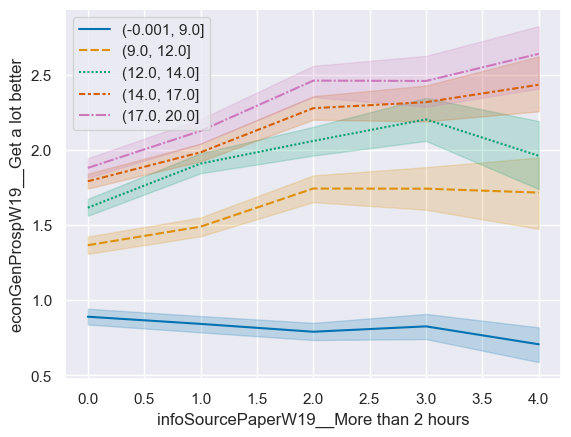

In [74]:
var2 = "econGenProspW19__Get a lot better"
var1 = "infoSourcePaperW19__More than 2 hours"
wave = 19
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# How do you think the general economic situation in this country and the financial situation of your
# household will change over the next 12 months?
# econGenProsp General economic situation in this country

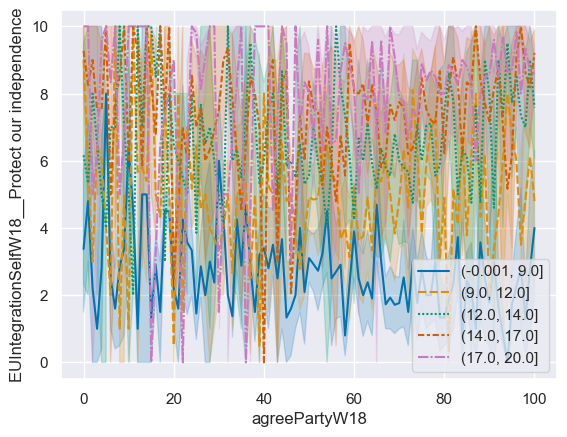

In [77]:

var2 = "EUIntegrationSelfW18__Protect our independence"
var1 = "agreePartyW18"
wave = 18
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));

# agreeParty?

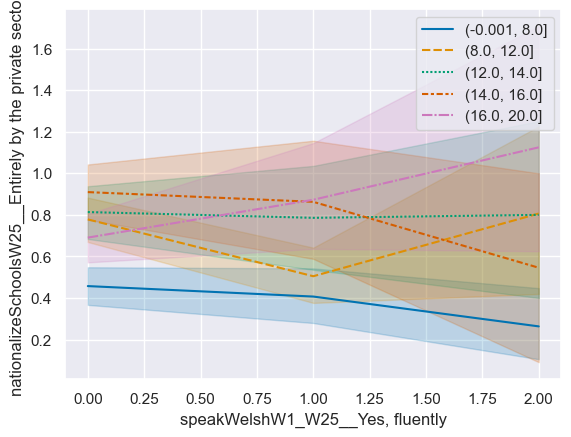

In [79]:
var2 = "nationalizeSchoolsW25__Entirely by the private sector"
var1 = "speakWelshW1_W25__Yes, fluently"
wave = 25
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
#Can you speak Welsh? 2 ○ Yes, fluently 1 ○ Yes, but not fluently 0 ○ No
#nationalizeSchools 

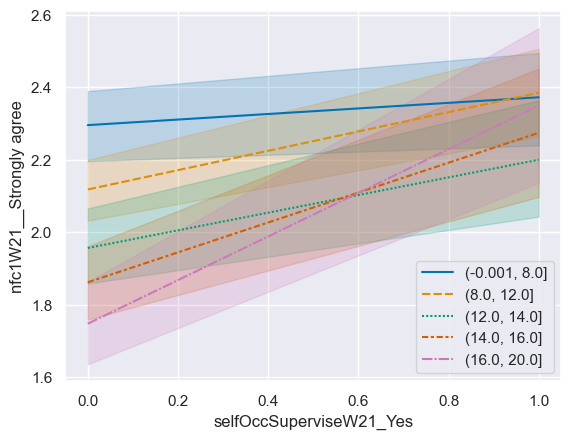

In [80]:

var2 = "nfc1W21__Strongly agree"
var1 = "selfOccSuperviseW21_Yes"
wave = 21
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# Do you supervise or are you responsible for the work of any other people?
# nfc1 I would prefer complex to simple problems

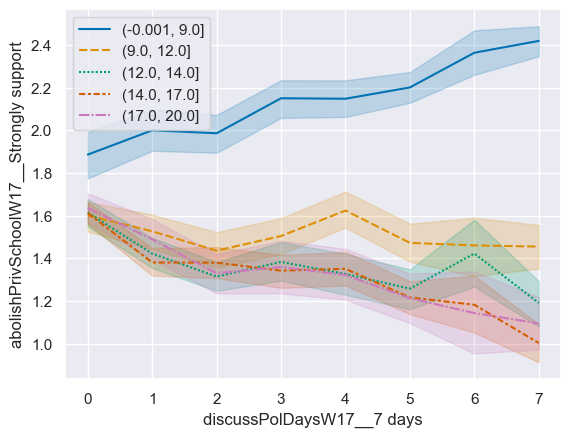

In [81]:
var2 = "abolishPrivSchoolW17__Strongly support"
var1 = "discussPolDaysW17__7 days"
wave = 17
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));


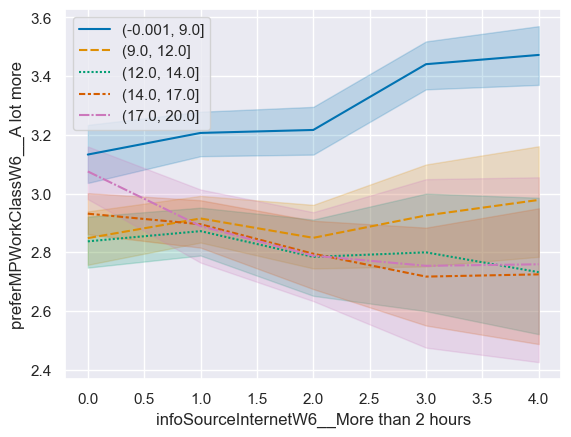

In [82]:
var2 = "preferMPWorkClassW6__A lot more"
var1 = "infoSourceInternetW6__More than 2 hours"
wave = 6
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));


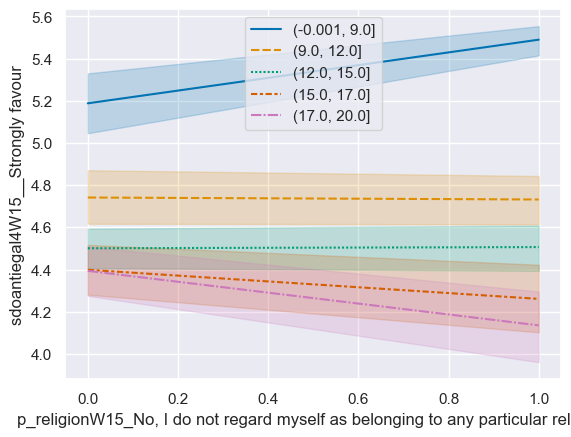

In [85]:

var2 = "sdoantiegal4W15__Strongly favour"
var1 = "p_religionW15_No, I do not regard myself as belonging to any particular religion."
wave = 15
q=5
sns.lineplot(data=BES_reduced_with_na,x=var1,y=var2,
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# sdoantiegal4 We should work to give all groups an equal chance to succeed.

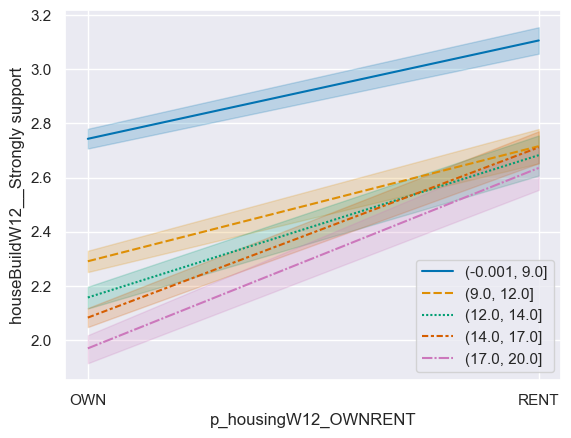

In [121]:
BES_Panel["p_housingW12"].cat.categories
housing_dict = {'Own â outright':"OWN", 'Own â with a mortgage':"OWN",
       'Own (part-own) â through shared ownership scheme (i.e. pay part mortgage, part rent)':"OWN",
       'Rent â from a private landlord':"RENT", 'Rent â from my local authority':"RENT",
       'Rent â from a housing association':"RENT",
       'Neither â I live with my parents, family or friends but pay some rent to them':np.nan,
       'Neither â I live rent-free with my parents, family or friends':np.nan,
       'Other':np.nan}

BES_Panel["p_housingW12_OWNRENT"] = BES_Panel["p_housingW12"].astype('object').replace(housing_dict)
BES_Panel["p_housingW12_OWNRENT"].value_counts(dropna=False)



var2 = "houseBuildW12__Strongly support"
var1 = "p_housingW12_OWNRENT"
wave = 12
q=5
sns.lineplot(x=BES_Panel["p_housingW12_OWNRENT"],y=BES_reduced_with_na["houseBuildW12__Strongly support"],
             hue=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q),
             style=pd.qcut(BES_Panel[wave_to_alscale[wave]].cat.codes.replace(-1,np.nan),q=q));
# sdoantiegal4 We should work to give all groups an equal chance to succeed.

In [101]:
store2[store2["att_var"]=="houseBuildW12__Strongly support"].sort_values(by='corr_gap_abs',ascending=False).head(50)

demo_var  \
284012      partyMemberW12__Yes, I am a member of a party   
284115                          discussPolDaysW12__7 days   
285248              infoSourcePaperW12__More than 2 hours   
296990                          p_religionW12_Yes - Islam   
285042                     participatePersuadeVoteW12_Yes   
284939                     participateCampMaterialW12_Yes   
292046                                   p_socgradeW12__E   
285454           infoSourceInternetW12__More than 2 hours   
293797                       p_paper_readW12_The Guardian   
292664          p_housingW12_Rent from my local authority   
293488                            p_paper_readW12_The Sun   
284527                       participateWorkForPtyW12_Yes   
292252                          p_housingW12_Own outright   
299256                     p_country_birthW12_Middle East   
297814                                    p_parentW12_Yes   
295857  p_religionW12_No, I do not regard myself as be...   
291222            p_gross_householdW12__£150,000 and over   
285660                                       fbUseW12_Yes   
290398  p_educationW12_Other technical, professional o...   
284733                           participatePosterW12_Yes   
288132                                      gorW12_London   
291943                            p_hh_sizeW12__8 or more   
292149  p_education_ageW12__Still at school/Full time ...   
284630                        participateGiveMoneyW12_Yes   
285866     fbInfo_2W12__Don't follow politics on facebook   
301110                          p_edlevelUniW12__Postgrad   
288750  p_educationW12_Youth training certificate/skil...   
294621                               p_paper_readW12_None   
298432                          p_country_birthW12_Africa   
283806                                 postalapplyW12_Yes   
300492                     p_ethnicityW12_Black Caribbean   
291119                         p_work_statW12_Not working   
300595                       p_ethnicityW12_Black African   
301007                             p_edlevelW12__Postgrad   
285763     fbInfo_1W12__Don't follow politics on facebook   
290604  p_work_statW12_Working part time (8-29 hours a...   
296166  p_religionW12_Yes - Presbyterian/Church of Sco...   
286896  workingStatusW6_W12_Not in paid work for any o...   
299977          p_ethnicityW12_Any other mixed background   
288647            p_educationW12_No formal qualifications   
286072  anyUniW12__Yes, I graduated from higher education   
290707  p_work_statW12_Working part time (Less than 8 ...   
298947       p_country_birthW12_Caribbean/Central America   
299668           p_ethnicityW12_White and Black Caribbean   
291531  p_job_sectorW12_Public sector government owned...   
288544                                    gorW12_Scotland   
287102                                countryW12_Scotland   
296784                        p_religionW12_Yes - Judaism   
286690        workingStatusW6_W12_Other full time student   
286999                                 countryW12_England   

                                att_var  high_auth_corr  low_auth_corr  \
284012  houseBuildW12__Strongly support        0.009264       0.193843   
284115  houseBuildW12__Strongly support       -0.008453       0.157056   
285248  houseBuildW12__Strongly support       -0.036187       0.128269   
296990  houseBuildW12__Strongly support        0.053647      -0.075358   
285042  houseBuildW12__Strongly support        0.005826       0.126339   
284939  houseBuildW12__Strongly support       -0.013463       0.105084   
292046  houseBuildW12__Strongly support        0.107348      -0.010234   
285454  houseBuildW12__Strongly support        0.030487       0.143830   
293797  houseBuildW12__Strongly support       -0.006236       0.104320   
292664  houseBuildW12__Strongly support        0.136678       0.029162   
293488  houseBuildW12__Strongly support        0.086914      -0.015442   
284527  houseBuildW12__Strongly support       -0.

In [97]:
store2[store2["att_var"].apply(lambda x: "house" in x)]["att_var"].value_counts()

att_var
houseBuildW12__Strongly support    165
Name: count, dtype: int64

In [91]:
search(BES_Panel,"home")

accessNewHomeW3              7039
homeOwnW14                  31063
homeAmtbW14                 21912
secondHomeW14               21912
secondHomeAmtbW14            2501
buyHomeFutureW14             8164
workHomeCoronaSelfW20       14591
workHomeCoronaPartnerW20    11208
homenormW23                 30949
homeOwn2W23                 30949
buyHomeFutureW23             8881
homeFinanceW23              30949
homeAmtbW23                 21130
homeOwn2W25                 30407
homeAmtbW25                 20710
buyHomeFutureW25             8777
homeFinanceW25              30407
dtype: int64